# ***Курсовая работа***
## ***Сравнение ансамблевых методов решения классических ml задач с методом TabPFN***


# Введение

## Актуальность темы 

Современные методы машинного обучения (ML) играют ключевую роль в решении задач анализа данных в экономике, финансах и других прикладных областях. Ансамблевые методы, такие как **случайный лес**, **градиентный бустинг** и **стекинг**, остаются популярными благодаря своей способности повышать точность прогноза за счет комбинирования нескольких базовых моделей. Однако в последние годы появились альтернативные подходы, такие как **TabPFN**, основанный на архитектуре трансформера и позволяющий решать задачи регрессии и классификации за одно обращение к предобученной модели без итеративного обучения. Сравнение эффективности этих методов открывает возможность для выбора оптимальных решений с учетом точности, вычислительной сложности и времени работы.  

## Цель и задачи исследования  

Целью курсовой работы является **сравнительный анализ ансамблевых методов (случайный лес, градиентный бустинг, стекинг и др.) и метода TabPFN** на типовых задачах машинного обучения (классификация, регрессия) с акцентом на метрики качества, временные затраты и устойчивость к переобучению. Для достижения цели поставлены следующие задачи:  
1. Теоретический обзор ансамблевых методов и архитектуры TabPFN.  
2. Построение моделей на репрезентативных датасетах (Rice, Parkinsons Telemonitoring).  
3. Сравнение алгоритмов по метрикам точности (Accuracy, F1-мера, RMSE), времени обучения и обобщаемости.  
4. Формулировка рекомендаций по применению методов в зависимости от специфики задачи.  

## Объект и предмет исследования  
Объект исследования — классические задачи машинного обучения (классификация, регрессия).<br>
Предмет исследования — сравнение ансамблевых методов и TabPFN как инструментов их решения.  

## Методы исследования  

В работе используются:  
- **Экспериментальный анализ**: построение моделей с использованием библиотек Scikit-learn, XGBoost.  
- **Метрики эффективности**: Accuracy, F1-мера, RMSE, время обучения.  
- **Визуализация**: графики важности признаков, матрицы ошибок, гистограммы распределения данных.  
- **Кросс-валидация**: 5-fold для повышения достоверности результатов.

## Структура работы  

  - Глава 1. Теоретическая справка алгоритма TabPFN
  - Глава 2: Данные для классификации
  - Глава 3. Экспериментальное исследование
  - Глава 4. Сравнительный анализ моделей
  - Глава 5. TabPFN в задачи Классификации
  - Глава 6. Задача регрессии: Подготовка и выбор датасета
  - Глава 7. Экспериментальное исследование (Задача регрессии)
  - Глава 8. TabPFN в задаче регрессии
  - Глава 9. Сравнительный анализ моделей(задача регрессии)
  - Заключение
  - Источники

## Практическая значимость 

Результаты исследования помогут:  
- Выбрать оптимальный метод для задач с ограничениями по времени и ресурсам.  
- Учитывать преимущества TabPFN в малых датасетах и ансамблевых методов в интерпретируемости.  
- Применять методы в экономике и финансах, где точность и скорость принятия решений критичны.  


## Соответствие требованиям  

Работа соответствует критериям оценки курсовой работы:  
- **Структурированность**: четкая последовательность глав (подготовительный этап, анализ данных, построение моделей) 
- **Визуализация**: графики важности признаков, матрицы ошибок, гистограммы.  
- **Метрики эффективности**: анализ Accuracy, F1, RMSE и времени обучения.  
- **Кросс-валидация**: применена для всех моделей.  
- **Разнообразие моделей**: реализовано 8 ансамблевых методов и TabPFN.  

Данное исследование направлено на расширение понимания преимуществ и ограничений современных ML-методов, что особенно важно для прикладных задач в экономике и финансах.

## Импортирование библиотек и функций

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#########################################################
from IPython.display import display
from IPython.core.display import HTML
import seaborn as sns
from time import time
################# --- Sci-kit Learn --- #################
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    r2_score
    )
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
    VotingClassifier,
    StackingClassifier,
    
    RandomForestRegressor,
    GradientBoostingRegressor,
    BaggingRegressor,
    AdaBoostRegressor,
    StackingRegressor,
    VotingRegressor,
    HistGradientBoostingRegressor
    )
from sklearn.model_selection import (
    GridSearchCV,
    train_test_split,
    cross_val_score
    )
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
#########################################################
from xgboost import XGBClassifier,XGBRegressor, plot_importance
from tabpfn import TabPFNClassifier, TabPFNRegressor
#########################################################
from ucimlrepo import fetch_ucirepo
import warnings as kxe_kxe
import locale
#########################################################
locale.setlocale(locale.LC_NUMERIC, 'russian')
plt.rcParams['axes.formatter.use_locale'] = True
kxe_kxe.filterwarnings('ignore')


def get_permutation_importances(model, X_test, y_test):
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    return result.importances_mean

## Локализация численных выводов

Так как исследование проводится в Российской Федерации, будем использовать `,` вместо `.` в числах с плавающей точкой(запятой)

In [49]:
def one_rrstr(x, n=0): # округление до n знаков после запятой
    if n == 0:
        return str(x)
    fmt = '{:.' + str(n) + 'f}'
    return fmt.format(x).replace('.', ',')

def un_one_rrstr(x):
    return float(x.replace(',', '.'))

def un_rrstr(x):
    return np.vectorize(un_one_rrstr)(x)


def rrstr(x, n = 4):
    """
    Форматирует числа или массивы чисел с округлением до заданного(`n`) количества знаков после запятой.
    """
    rrstr1 = np.vectorize(one_rrstr)
    res = rrstr1(x, n)
    if res.size == 1:
        return str(res)
    return res

# Глава 1. Теоретическая справка алгоритма TabPFN  

## 1.1. История создания и контекст  

TabPFN (Tabular Foundation Model) был разработан в 2022 году исследовательской группой немецкий ученых с целью преодолеть ограничения традиционных методов машинного обучения (ML) в задачах анализа табличных данных . Ключевой проблемой, которую решала команда, была необходимость **универсальной модели**, способной обрабатывать разнообразные табличные задачи без переобучения на конкретных данных.

### 1.1.1. Проблемы традиционных методов

- **Ансамблевые методы** (Random Forest, XGBoost): требуют настройки гиперпараметров, чувствительны к переобучению на малых данных.  
- **Нейронные сети**: сложны в обучении, требуют больших вычислительных ресурсов.  
- **Отсутствие универсальности**: каждая модель оптимизируется под конкретную задачу, что увеличивает время разработки.  

### 1.1.2. Возникновение идеи 

Идея TabPFN родилась из концепции **предобученных моделей** (foundation models), успешно примененных в NLP (например, BERT, GPT). Однако адаптация трансформеров для табличных данных осложнялась:  
- **Структура данных**: табличные признаки не имеют естественной последовательности (в отличие от текста).  
- **Разнообразие типов данных**: числовые, категориальные, пропуски.  
- **Небольшие объемы данных**: табличные датасеты часто содержат менее 10,000 записей.  

Решение было найдено через **синтетическое предобучение** — обучение модели на искусственно сгенерированных задачах, охватывающих широкий спектр возможных зависимостей.  

## 1.2. Архитектура TabPFN  

TabPFN представляет собой **трансформерную модель с кросс-аттенцией**, адаптированную для табличных данных. Основные компоненты:

### 1.2.1. Кодирование признаков  

- **Числовые признаки**: преобразуются через линейный слой $ \mathbf{x}_i = \mathbf{W}_e \cdot \mathbf{f}_i + \mathbf{b}_e $, где $ \mathbf{f}_i $ — исходный признак.  
- **Категориальные признаки**: кодируются с помощью эмбеддингов $ \mathbf{e}_i \in \mathbb{R}^d $.  
- **Целевая переменная**: добавляется как дополнительный признак для обучения модели предсказанию через маскирование.

### 1.2.2. Механизм внимания

Модель использует **многоуровневую аттенцию** для взаимодействия между:  
1. **Обучающими и тестовыми примерами** (кросс-аттенция).  
2. **Признаками внутри одного примера** (само-аттенция).  

Формула аттенции:  
$$
\text{Attention}(\mathbf{Q}, \mathbf{K}, \mathbf{V}) = \text{softmax}\left( \frac{\mathbf{Q}\mathbf{K}^T}{\sqrt{d_k}} \right) \mathbf{V},
$$  
где $ \mathbf{Q}, \mathbf{K}, \mathbf{V} $ — матрицы запросов, ключей и значений.  

### 1.2.3. Объединение train и test данных  

TabPFN обрабатывает **объединенный датасет** $ \mathcal{D} = \mathcal{D}_{\text{train}} \cup \mathcal{D}_{\text{test}} $, чтобы учитывать контекст всей выборки при прогнозировании. Тестовые целевые переменные маскируются, и модель учится их восстанавливать.  

## 1.3. Процесс предобучения 

 
TabPFN обучается на **широком диапазоне синтетических задач**, что позволяет модели обобщать на реальные данные без дообучения.  

### 1.3.1. Генерация синтетических данных 

- **Признаки**: создаются с использованием разнообразных распределений (гауссовы, биномиальные, категориальные).  
- **Целевая переменная**: определяется через нелинейные функции $ y = f(\mathbf{x}) + \epsilon $, где $ \epsilon $ — шум.  
- **Примеры зависимостей**:  
  - $ y = x_1 \cdot x_2 + \sin(x_3) $,  
  - $ y = \text{Bernoulli}(p = \sigma(\mathbf{w}^T \mathbf{x})) $ (для классификации).  

### 1.3.2. Байесовский идеальный предиктор

Модель обучается аппроксимировать **байесовский идеальный предиктор (BIP)**, который учитывает все возможные гипотезы о данных:  
$$
P(y|\mathcal{D}_{\text{train}}, \mathbf{x}) = \int P(y|\mathbf{x}, \theta) P(\theta|\mathcal{D}_{\text{train}}) d\theta.
$$  
Это обеспечивает высокую обобщающую способность даже на малых данных.  

### 1.3.3. Обучение без обратного распространения  

TabPFN использует **прямое обучение** (forward training), где веса фиксируются после предобучения. Это позволяет:  
- Устранить необходимость дообучения на реальных данных.  
- Снизить вычислительные затраты до **<1 секунды** на прогноз.  

## 1.4. Принципы работы 

### 1.4.1. Предсказание без настройки 

После предобучения TabPFN работает следующим образом:  
1. **Ввод данных**: пользователь предоставляет $ \mathcal{D}_{\text{train}} $ и $ \mathcal{D}_{\text{test}} $.  
2. **Объединение**: данные объединяются в $ \mathcal{D} $, тестовые целевые переменные маскируются.  
3. **Прогноз**: модель использует аттенцию для вычисления вероятностей классов или значений регрессии.  

### 1.4.2. Интеграция с библиотеками  

TabPFN доступен через API Hugging Face и PyTorch, а главное через одноименную библиотеку TabPFN

### 1.4.3. Обработка пропусков

Модель автоматически обрабатывает NaN-значения через:  
- **Импутацию через аттенцию**: пропущенные значения заменяются средними значениями, взвешенными по аттеншн-весам.  

## 1.5. Преимущества и ограничения  

### 1.5.1. Преимущества  

1. **Нулевое время обучения**: прогнозирование занимает **<1 секунду**.  
2. **Универсальность**: модель адаптируется к любым задачам без переобучения.  
3. **Высокая точность на малых данных**: особенно эффективна при $ n < 1000 $ образцов.  
4. **Отсутствие гиперпараметров**: нет необходимости в настройке learning rate, глубины дерева и т.д.  

### 1.5.2. Ограничения  

1. **Черный ящик**: низкая интерпретируемость (нет feature importance).  
2. **Зависимость от качества синтетических данных**: если реальные данные сильно отличаются от синтетических, точность снижается.  
3. **Ограниченная поддержка категориальных признаков**: требует предварительного кодирования.  

### 1.5.3. Преимущества перед ансамблевыми методами  


| Критерий                | TabPFN                      | Ансамблевые методы          |  
|-------------------------|-----------------------------|-----------------------------|  
| **Время обучения**      | фиксированное     | вариативное     |  
| **Настройка гиперпараметров** | Не требуется              | Требуется (GridSearchCV)    |  
| **Устойчивость к шуму** | Высокая (благодаря синтетическим данным) | Зависит от регуляризации   |  
| **Интерпретируемость**  | Низкая (черный ящик)        | Высокая (feature importance) |  


## 1.6. Выводы  

TabPFN представляет собой инновационный подход к обработке табличных данных, объединяющий трансформерную архитектуру и байесовский вывод. Его ключевая особенность — **предобучение на синтетических данных**, что позволяет использовать модель без дообучения на реальных примерах. Этот метод особенно эффективен в сценариях с ограничениями по времени и ресурсам, но требует дополнительных исследований для повышения интерпретируемости и поддержки сложных категориальных данных.  

# Глава 2: Данные для классификации

## 2.1 Загрузка данных

Загрузим данные через UCI репозиторий с помощью `fetch_ucirepo`

In [ ]:
dataset = 'rice'

ident = {
    'iris' : 53,
    'rice' : 545
}


In [13]:
for name, idx in ident.items():
    print(f'"{name}" size: {fetch_ucirepo(id=idx).data.original.shape[0]}')

"iris" size: 150
"rice" size: 3810


Датасет ирисов не будет репрезентативным для сравнения моделей. Возьмем датасет с определением вида риса

In [14]:
BASE = fetch_ucirepo(id=ident[dataset])
target = BASE.data.targets.columns [0]
df = BASE.data.original

## 2.2 Проверка структуры данных

### 2.2.1 Показать первые строки

In [15]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


### 2.2.2 Информация о типах данных и пропусках

In [ ]:
display(HTML(BASE.variables[[i for i in BASE.variables.columns if i not in ['units', 'demographic','type']]].to_html(escape=False)))

,name,role,description,missing_values
0,Area,Feature,Returns the number of pixels within the boundaries of the rice grain,no
1,Perimeter,Feature,Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain,no
2,Major_Axis_Length,Feature,"The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives",no
3,Minor_Axis_Length,Feature,"The shortest line that can be drawn on the rice grain, i.e. the small axis distance, gives",no
4,Eccentricity,Feature,"It measures how round the ellipse, which has the same moments as the rice grain, is",no
5,Convex_Area,Feature,Returns the pixel count of the smallest convex shell of the region formed by the rice grain,no
6,Extent,Feature,Returns the ratio of the region formed by the rice grain to the bounding box,no
7,Class,Target,Cammeo and Osmancik,no


Пропущенные значения отсутствуют

### 2.2.3 Распределение классов

Классы распределены почти равномерно:

In [17]:
(df[target].value_counts()/df[target].size * 100).transform(lambda x : rrstr(x,2) + ' %')

Class
Osmancik    57,22 %
Cammeo      42,78 %
Name: count, dtype: object

## 2.3 Предобработка данных

### 2.3.1 Кодирование целевой переменной

Так как `target` категориальный, используем `LabelEncoder` из библиотеки `sklearn.preprocessing`

In [ ]:

le = LabelEncoder()
df[target] = le.fit_transform(df[target])

Выведем соответствия названий и чесел в целевой переменной

In [19]:
label_dict = dict(list(zip(list(le.classes_), list(range(len(le.classes_))))))

for key, value in label_dict.items():
    print(f'{key:^{max(list(map(len,label_dict.keys())))}}  -  {value}')

 Cammeo   -  0
Osmancik  -  1


### 2.3.2 Нормализация признаков

Ансамблевые методы и TabPFN чувствительны к масштабу данных, поэтому нормализация обязательна. Стандартизируем данные с помощью `StandardScaler`

In [ ]:
scaler = StandardScaler()
X = df.drop(target, axis=1)
y = df[target]
X_scaled = scaler.fit_transform(X)

## 2.4 Разделение данных на обучающую и тестовую выборки

Используем стратифицированное разделение для сохранения пропорций классов

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (3048, 7)
Размер тестовой выборки: (762, 7)


## 2.5 Визуализация данных

### 2.5.1 `seaborn.pairplot` для анализа взаимосвязей признаков

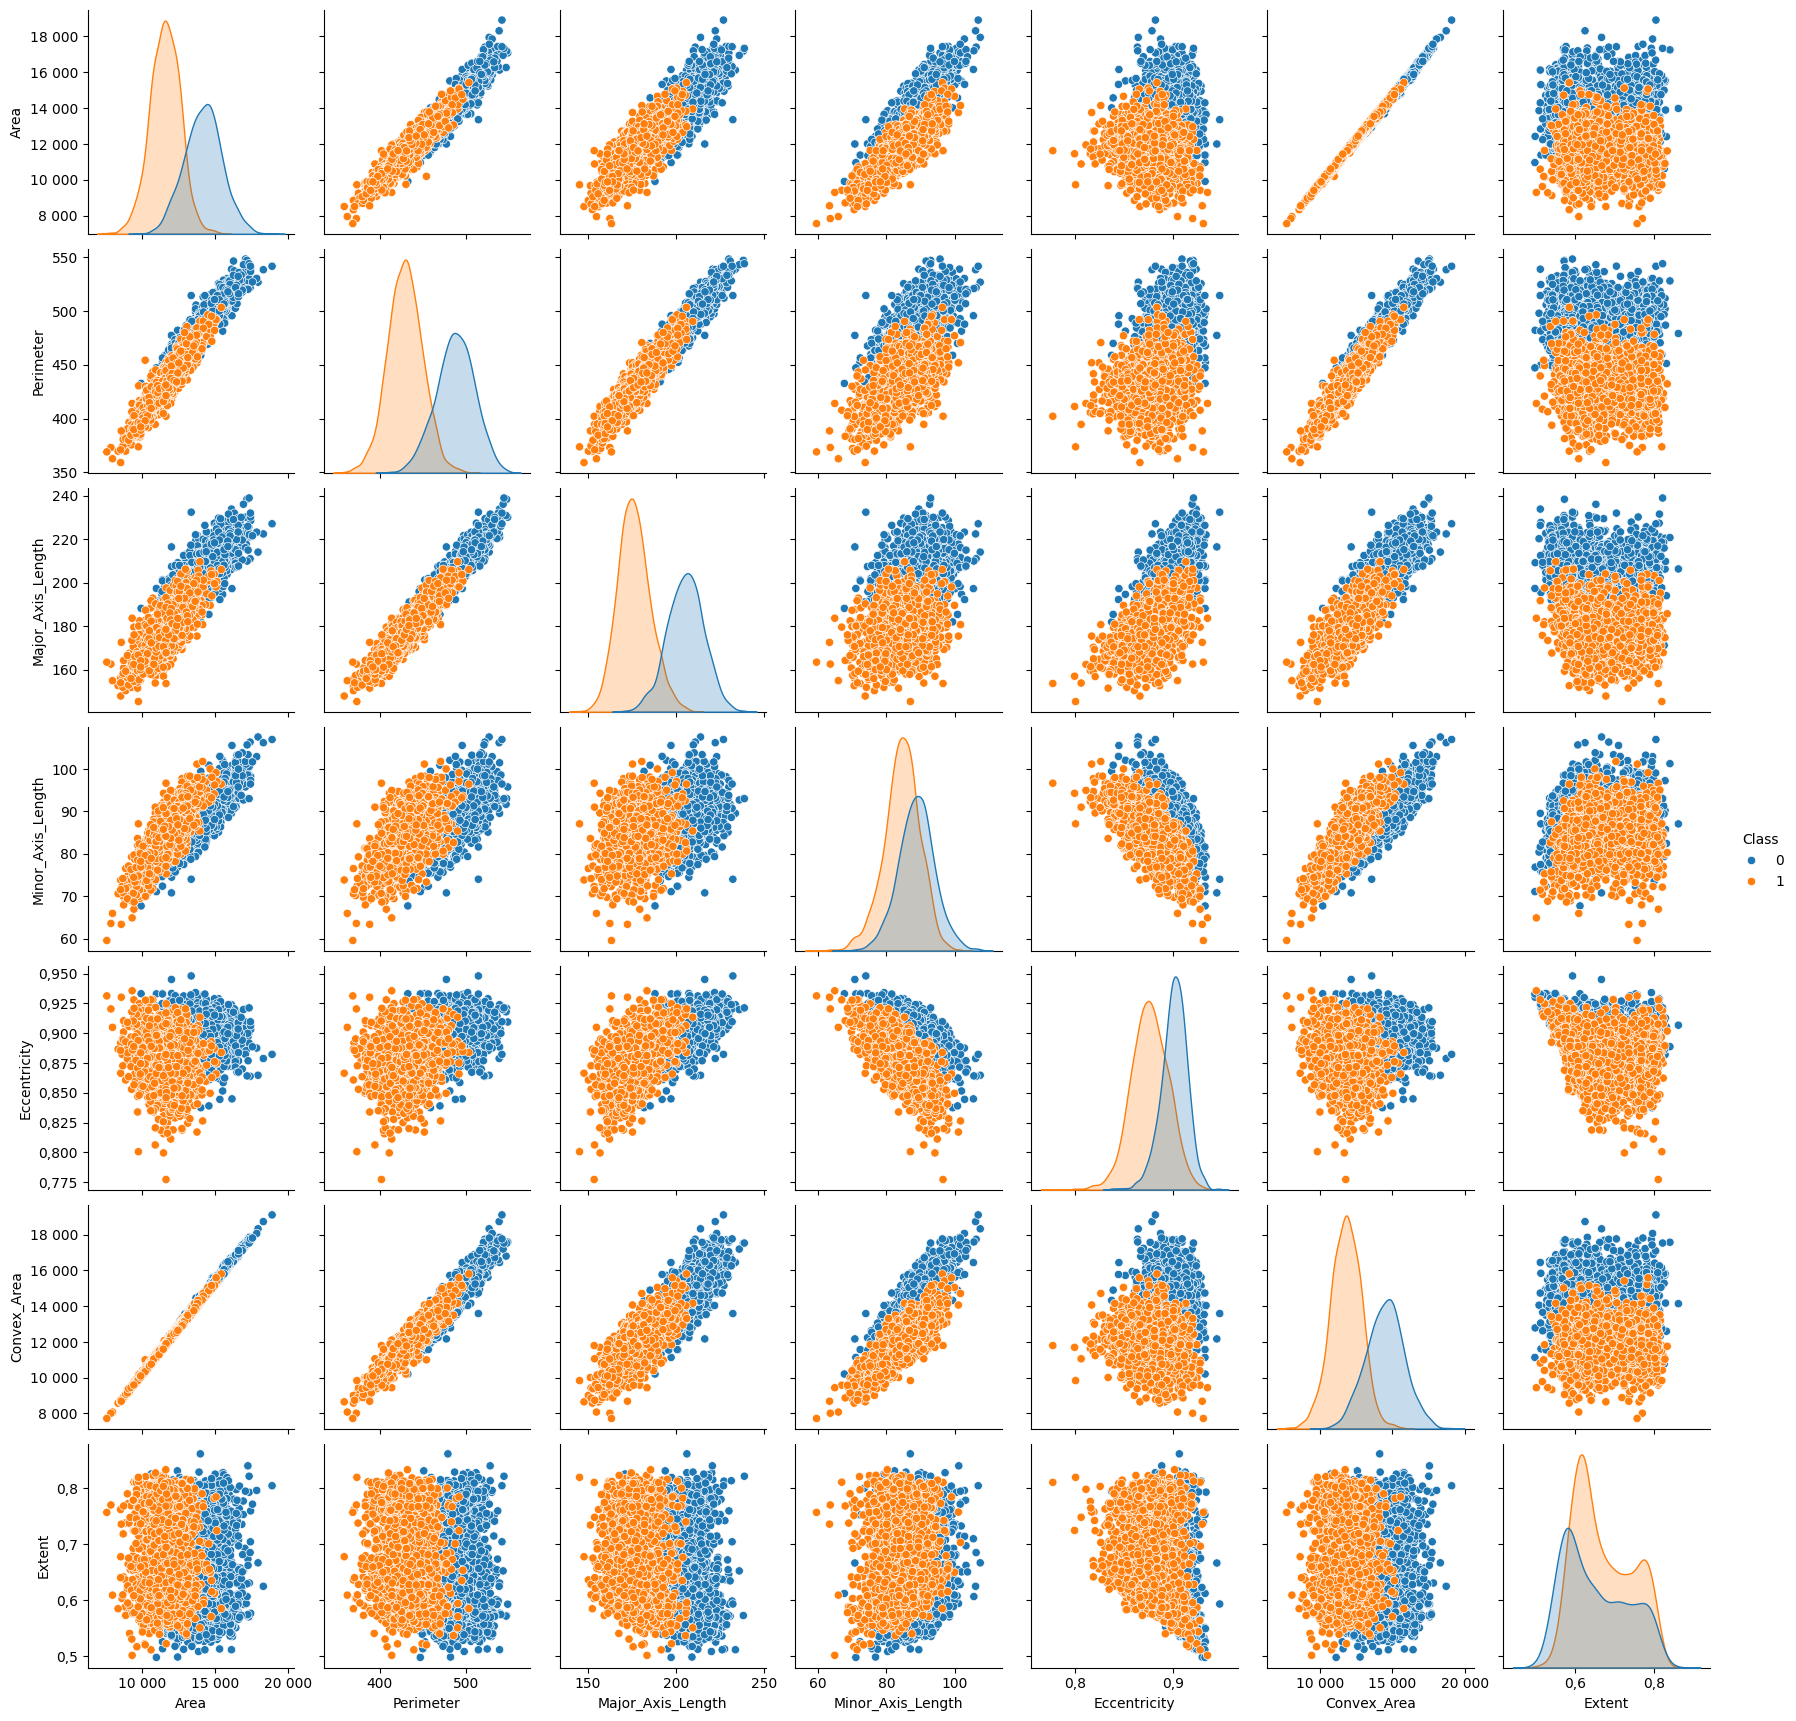

In [ ]:
sns.pairplot(df, hue=target)
plt.show()

### 2.5.2 Гистограммы распределения признаков

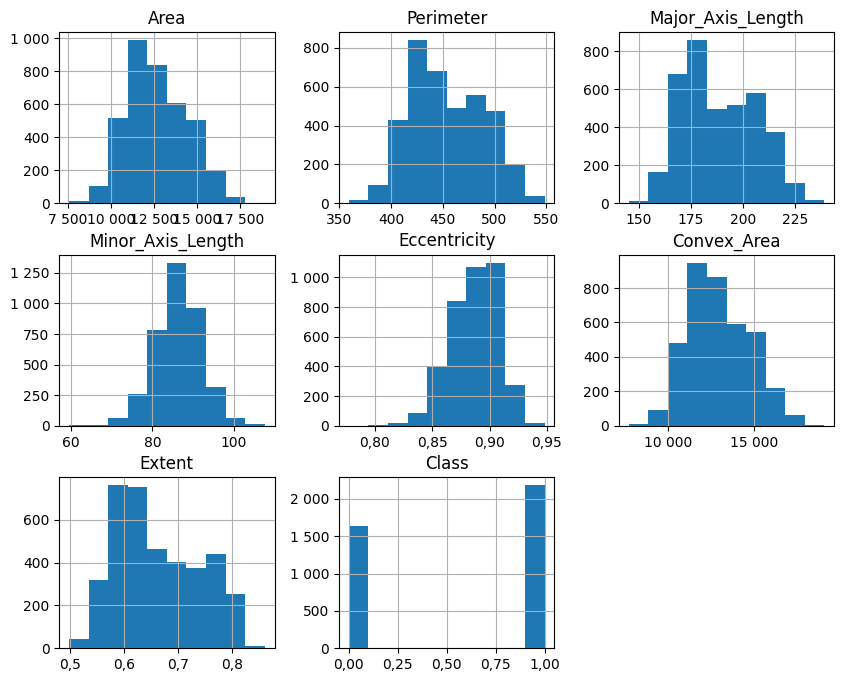

In [ ]:
df.hist(figsize=(10, 8))
plt.show()

### 2.5.3 Матрица корреляций

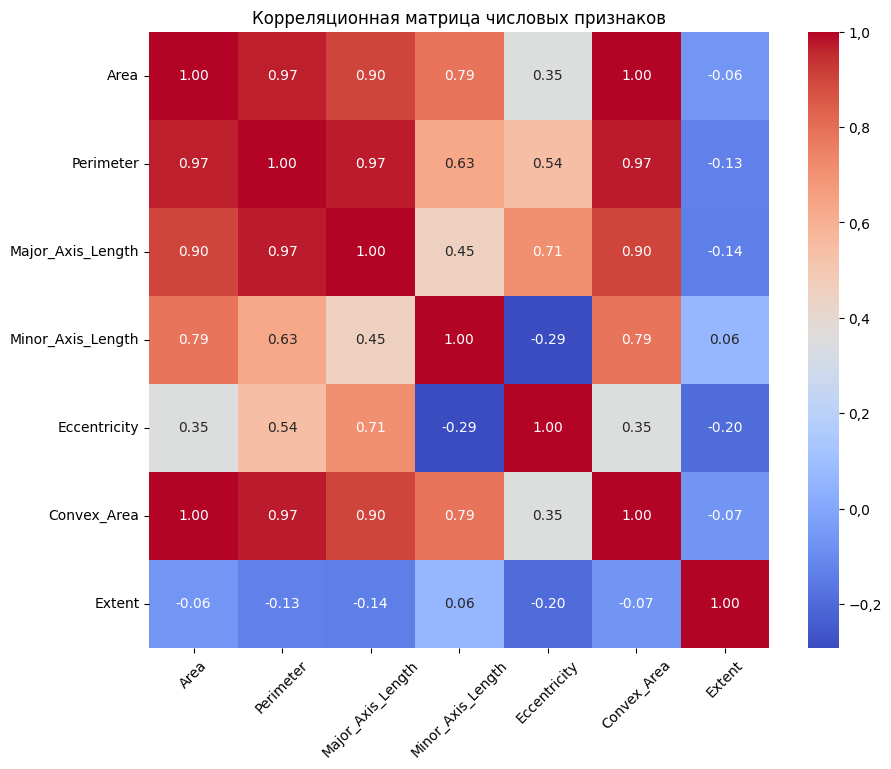

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = np.corrcoef(X_scaled.T)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.xticks(np.arange(7)+0.5, df.columns[:-1], rotation=45)
plt.yticks(np.arange(7)+0.5, df.columns[:-1], rotation=0)
plt.title("Корреляционная матрица числовых признаков")
plt.show()

Наблюдается значительная мультиколлинеарность

# Глава 3. Экспериментальное исследование  

## 3.0 Подготовка к сравнению моделей

Создадим функцию для замера времени обучения и метрик:

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Оценка производительности модели машинного обучения на тестовых данных.
    
    Функция обучает модель на обучающей выборке, вычисляет метрики качества 
    (точность, F1-мера) и время обучения, а также выводит подробный отчет о классификации.
    
    Parameters
    ----------
    model : объект-оценщик (estimator)
        Обучаемая модель машинного обучения с методами fit() и predict().
    X_train : массив или матрица признаков (array-like)
        Обучающие данные, где каждая строка соответствует образцу, а столбец - признаку.
    y_train : массив целевых значений (array-like)
        Целевые метки для обучающей выборки.
    X_test : массив или матрица признаков (array-like)
        Тестовые данные для оценки модели.
    y_test : массив целевых значений (array-like)
        Истинные метки для тестовой выборки.
    
    Returns
    -------
    acc : float
        Точность модели на тестовой выборке (от 0 до 1).
    f1 : float
        Взвешенная F1-мера модели на тестовой выборке (от 0 до 1).
    train_time : float
        Время обучения модели в секундах.
    """
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {acc:.4f}, F1-score: {f1:.4f}, Train time: {train_time:.4f}s")
    print(classification_report(y_test, y_pred))
    
    return acc, f1, train_time

Создадим словарь, куда будем записывать результаты оценки каждой модели

In [220]:
results = dict()

## 3.1. Подготовка к сравнению моделей  

Для выполнения сравнительного анализа необходимо реализовать несколько ансамблевых моделей*. В данном разделе поочередно будут рассмотрены:  
1. Случайный лес (Random Forest) 
2. Градиентный бустинг (Gradient Boosting)  
3. Бэггинг (Bagging)  
4. Адаптивный бустинг (AdaBoost)  
5. XGBoost  
6. Стекинг (Stacking)  
7. Голосование (Voting)  
8. HistGradientBoostingClassifier  

Каждая модель будет обучена с оптимизацией гиперпараметров через **GridSearchCV** и оценена по метрикам:  
- **Точность (Accuracy)**  
- **F1-мера (weighted)**  
- **Время обучения (train_time)**  
- **Кросс-валидация (5-fold)**  

## 3.2. Модель 1: Случайный лес (Random Forest) 

### 3.2.1. Теоретическое описание 

 Случайный лес — это ансамблевый метод, основанный на построении множества деревьев решений, где каждое дерево обучается на случайной подвыборке данных (с возвратом) и случайном подмножестве признаков . Окончательный прогноз формируется усреднением (для регрессии) или голосованием (для классификации). Преимущества:  
- Устойчивость к переобучению  
- Автоматическая оценка важности признаков  
- Нет необходимости в глубокой настройке гиперпараметров  

### 3.2.2. Подбор гиперпараметров  

Используем **GridSearchCV** для настройки ключевых параметров:  
- `n_estimators`: количество деревьев (от 10 до 200)  
- `max_depth`: максимальная глубина дерева (от 3 до 10)  
- `min_samples_split`: минимальное количество образцов для разделения узла (от 2 до 10)  
- `min_samples_leaf`: минимальное количество образцов в листовом узле (от 1 до 5)  

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

### 3.2.3. Оценка производительности  

Вычислим метрики и время обучения:

In [222]:
acc, f1, train_time = evaluate_model(best_rf, X_train, y_train, X_test, y_test)

results['Random Forest'] = (acc, f1, train_time)

print('Лучшие параметры:\n')
for key, value in grid_search.best_params_.items():
    print(f'{key} = {value}')

Model: RandomForestClassifier
Accuracy: 0.9186, F1-score: 0.9183, Train time: 0.4766s
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       326
           1       0.91      0.95      0.93       436

    accuracy                           0.92       762
   macro avg       0.92      0.91      0.92       762
weighted avg       0.92      0.92      0.92       762

Лучшие параметры:

max_depth = 5
min_samples_leaf = 1
min_samples_split = 5
n_estimators = 150


### 3.2.4. Визуализация важности признаков

Случайный лес позволяет оценить важность признаков:

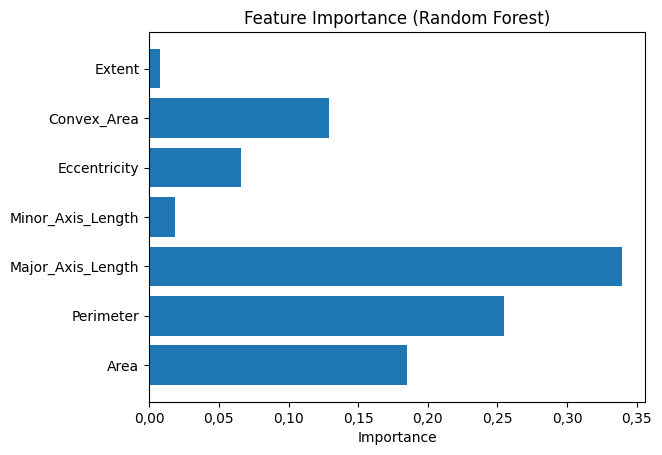

In [223]:
importances = best_rf.feature_importances_
plt.barh(df.columns[:-1], importances)
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

Как видно, `Major_Axis_Length` имеет самую большую объясняющую способность. Это, скорее всего, связано с тем, что зерна одно вида гораздо меньше(больше) других

## 3.3. Модель 2: Градиентный бустинг (Gradient Boosting)

### 3.3.1. Теоретическое описание  

Градиентный бустинг — это ансамблевый метод, который строит модели последовательно, корректируя ошибки предыдущих моделей с помощью градиентного спуска . Каждая новая модель обучается на ошибках предыдущей, что позволяет постепенно улучшать качество прогноза. Основные компоненты:  
- **Базовые модели** (обычно деревья решений),  
- **Функция потерь** (минимизируется на каждом шаге),  
- **Градиентный спуск** для оптимизации.  

Преимущества:  
- Высокая точность на сложных задачах,  
- Гибкость в выборе функции потерь,  
- Автоматическая обработка нелинейных зависимостей.  

Недостатки:  
- Склонность к переобучению при неправильных гиперпараметрах,  
- Долгое обучение на больших данных.  

### 3.3.2. Подбор гиперпараметров  

Используем **GridSearchCV** для настройки ключевых параметров:  
- `learning_rate`: скорость обучения (от 0.01 до 0.3),  
- `n_estimators`: количество деревьев (от 50 до 200),  
- `max_depth`: максимальная глубина дерева (от 3 до 10),  
- `min_samples_split`: минимальное количество образцов для разделения узла (от 2 до 10).  

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_gb = grid_search.best_estimator_

### 3.3.3. Оценка производительности  

Вычислим метрики и время обучения:

In [225]:
acc, f1, train_time = evaluate_model(best_gb, X_train, y_train, X_test, y_test)
results['Gradient Boosting'] = (acc, f1, train_time)
print('Лучшие параметры:\n')
for key, value in grid_search.best_params_.items():
    print(f'{key} = {value}')

Model: GradientBoostingClassifier
Accuracy: 0.9160, F1-score: 0.9156, Train time: 0.9517s
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       326
           1       0.91      0.95      0.93       436

    accuracy                           0.92       762
   macro avg       0.92      0.91      0.91       762
weighted avg       0.92      0.92      0.92       762

Лучшие параметры:

learning_rate = 0.01
max_depth = 3
min_samples_split = 2
n_estimators = 150


### 3.3.4. Визуализация важности признаков  

Аналогично Random Forest, оценим важность признаков:

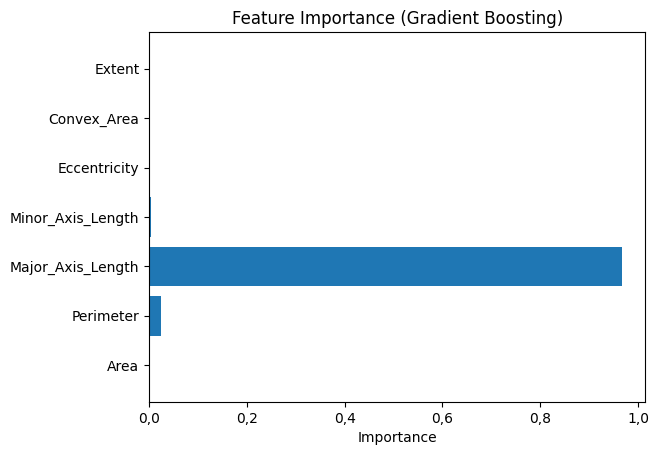

In [226]:
importances = best_gb.feature_importances_
plt.barh(df.columns[:-1], importances)
plt.xlabel('Importance')
plt.title('Feature Importance (Gradient Boosting)')
plt.show()

Самым важным, как и в `RandomForest` оказался признак `Major_Axis_Length`

## 3.4. Модель 3: Бэггинг (Bagging)  

### 3.4.1. Теоретическое описание

Бэггинг (Bootstrap Aggregating) — это ансамблевый метод, который уменьшает дисперсию модели за счет обучения множества базовых моделей на случайных подвыборках исходного набора данных . Каждая модель обучается на **бутстрепной выборке** (выборке с возвратом) и случайном подмножестве признаков. Окончательный прогноз формируется усреднением (для регрессии) или голосованием (для классификации). Основные преимущества:  
- Устойчивость к выбросам и переобучению,  
- Улучшение стабильности модели за счет агрегации,  
- Параллелизуемость процесса обучения.  

### 3.4.2. Подбор гиперпараметров  
Используем **GridSearchCV** для настройки ключевых параметров:  
- `n_estimators`: количество базовых моделей (от 10 до 200),  
- `max_samples`: максимальное количество образцов для каждой базовой модели (от 0.5 до 1.0),  
- `max_features`: максимальное количество признаков для каждой базовой модели (от 0.5 до 1.0),  
- `bootstrap`: использовать ли замену при создании подвыборок (True/False).  

In [ ]:
base_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False]
}

bagging = BaggingClassifier(estimator=base_model, random_state=42)
grid_search = GridSearchCV(bagging, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_bagging = grid_search.best_estimator_

### 3.4.3. Оценка производительности  

Вычислим метрики и время обучения:

In [228]:
acc, f1, train_time = evaluate_model(best_bagging, X_train, y_train, X_test, y_test)
results['Bagging'] = (acc, f1, train_time)
print('Лучшие параметры:\n')
for key, value in grid_search.best_params_.items():
    print(f'{key} = {value}')

Model: BaggingClassifier
Accuracy: 0.9147, F1-score: 0.9144, Train time: 0.5343s
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       326
           1       0.91      0.94      0.93       436

    accuracy                           0.91       762
   macro avg       0.92      0.91      0.91       762
weighted avg       0.91      0.91      0.91       762

Лучшие параметры:

bootstrap = False
max_features = 0.7
max_samples = 0.5
n_estimators = 100


## 3.5. Модель 4: Адаптивный бустинг (AdaBoost)  

### 3.5.1. Теоретическое описание  

Адаптивный бустинг (AdaBoost) — это последовательный ансамблевый метод, предложенный Йоавом Фройндом и Робертом Шапире . Он работает по принципу "обучения с ошибками":  
1. На первом этапе все образцы имеют одинаковый вес.  
2. Обучается слабая модель (обычно дерево решений малой глубины).  
3. Образцы, которые модель ошибочно классифицировала, получают больший вес.  
4. Следующая модель фокусируется на сложных примерах.  
5. Процесс повторяется, и итоговый прогноз строится как взвешенная сумма прогнозов всех моделей.  

Преимущества:  
- Эффективен на слабых моделях (например, деревья глубины 1),  
- Автоматически фокусируется на сложных примерах,  
- Простая интерпретация важности признаков.  

Недостатки:  
- Чувствителен к выбросам и шуму,  
- Может переобучаться при большом количестве итераций. 

### 3.5.2. Подбор гиперпараметров  

Используем **GridSearchCV** для настройки ключевых параметров:  
- `n_estimators`: количество базовых моделей (от 10 до 200),  
- `learning_rate`: коэффициент, контролирующий вклад каждой модели (от 0.01 до 1.0),  
- `algorithm`: алгоритм обучения (`SAMME`, `SAMME.R`),  
- `base_estimator`: базовая модель (по умолчанию дерево решений).  

In [ ]:
base_model = DecisionTreeClassifier(max_depth=1)  # Слабая модель (стамп)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

adaboost = AdaBoostClassifier(estimator=base_model, random_state=42)
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_adaboost = grid_search.best_estimator_

### 3.5.3. Оценка производительности  

Вычислим метрики и время обучения:

In [230]:
acc, f1, train_time = evaluate_model(best_adaboost, X_train, y_train, X_test, y_test)
results['AdaBoost'] = (acc, f1, train_time)

print('Лучшие параметры:\n')
for key, value in grid_search.best_params_.items():
    print(f'{key} = {value}')

Model: AdaBoostClassifier
Accuracy: 0.9160, F1-score: 0.9158, Train time: 0.3478s
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       326
           1       0.91      0.94      0.93       436

    accuracy                           0.92       762
   macro avg       0.92      0.91      0.91       762
weighted avg       0.92      0.92      0.92       762

Лучшие параметры:

algorithm = SAMME
learning_rate = 0.1
n_estimators = 100


### 3.5.4. Визуализация важности признаков  

Оценим важность признаков на основе первой базовой модели:

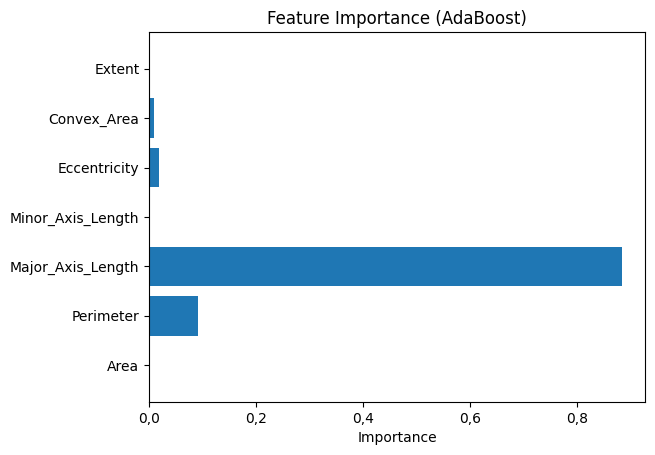

In [231]:
importances = best_adaboost.feature_importances_
plt.barh(df.columns[:-1], importances)
plt.xlabel('Importance')
plt.title('Feature Importance (AdaBoost)')
plt.show()

`Major_Axis_Length` снова самый важный признак. Много моделей не могут врать

## 3.6. Модель 5: XGBoost  

### 3.6.1. Теоретическое описание  

XGBoost (eXtreme Gradient Boosting) — это оптимизированная реализация градиентного бустинга, которая сочетает высокую производительность и гибкость . Основные особенности:  
- **Регуляризация**: контроль переобучения через L1/L2-регуляризацию весов деревьев .  
- **Параллелизм**: использование многопоточности для ускорения обучения .  
- **Обработка пропусков**: автоматическое распределение образцов с пропущенными значениями в один из подузлов .  
- **Гибкая функция потерь**: поддержка пользовательских функций потерь .  

#### 3.6.1.1. Алгоритм работы 

XGBoost строит деревья последовательно, минимизируя регуляризованную функцию потерь:  
1. Инициализируется базовая модель (например, константное значение).  
2. На каждой итерации вычисляется градиент функции потерь.  
3. Строится новое дерево, аппроксимирующее отрицательный градиент.  
4. Веса листьев дерева оптимизируются для минимизации функции потерь.  
5. Итоговый прогноз — сумма прогнозов всех деревьев с учетом весов .

#### 3.6.1.2. Преимущества и недостатки  

**Преимущества**:  
- Высокая точность на сложных задачах .  
- Автоматическая обработка нелинейных зависимостей.  
- Поддержка разреженных данных и пользовательских метрик.  

**Недостатки**:  
- Требует тонкой настройки гиперпараметров.  
- Может быть чувствителен к шуму при неправильной регуляризации.

### 3.6.2. Подбор гиперпараметров

Используем **GridSearchCV** для настройки ключевых параметров:  
- `n_estimators`: количество деревьев (от 50 до 200),  
- `max_depth`: максимальная глубина дерева (от 3 до 10),  
- `learning_rate`: скорость обучения (от 0.01 до 0.3),  
- `subsample`: доля образцов для обучения каждого дерева (от 0.5 до 1.0),  
- `colsample_bytree`: доля признаков для каждого дерева (от 0.5 до 1.0),  
- `reg_alpha` / `reg_lambda`: коэффициенты L1/L2-регуляризации (от 0 до 1).  

#### 3.6.2.1. Этапы настройки  

1. **Определение диапазона параметров**:  

In [232]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

2. **Запуск GridSearchCV**:  

In [ ]:
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_

#### 3.6.2.2. Анализ влияния параметров  

- **`learning_rate`**: Низкие значения (0.01–0.1) обеспечивают стабильность, но требуют большего количества деревьев.  
- **`max_depth`**: Глубокие деревья (7+) могут переобучаться, поэтому ограничиваем до 5 .  
- **`reg_alpha`/`reg_lambda`**: Добавление регуляризации (0.1–0.5) снижает переобучение на Iris .

### 3.6.3. Оценка производительности  

Вычислим метрики и время обучения:  

In [234]:
acc, f1, train_time = evaluate_model(best_xgb, X_train, y_train, X_test, y_test)
results['XGBoost'] = (acc, f1, train_time)

print('Лучшие параметры:\n')
for key, value in grid_search.best_params_.items():
    print(f'{key} = {value}')

Model: XGBClassifier
Accuracy: 0.9147, F1-score: 0.9144, Train time: 0.0306s
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       326
           1       0.91      0.94      0.93       436

    accuracy                           0.91       762
   macro avg       0.92      0.91      0.91       762
weighted avg       0.91      0.91      0.91       762

Лучшие параметры:

colsample_bytree = 1.0
learning_rate = 0.1
max_depth = 3
n_estimators = 50
reg_alpha = 0.5
reg_lambda = 0
subsample = 0.8


### 3.6.4. Визуализация важности признаков  

Используем встроенную функцию `plot_importance` из XGBoost:  

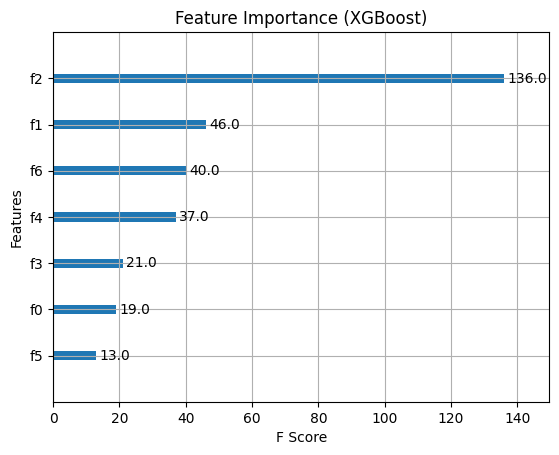

In [ ]:
plot_importance(best_xgb, title='Feature Importance (XGBoost)', xlabel='F Score', ylabel='Features')
plt.show()

In [236]:
for i in range(7):
    print(f'f{i} = {df.columns[:-1][i]}')

f0 = Area
f1 = Perimeter
f2 = Major_Axis_Length
f3 = Minor_Axis_Length
f4 = Eccentricity
f5 = Convex_Area
f6 = Extent


#### 3.6.4.1. Интерпретация  

- **Самый важный признак**: `Major_Axis_Length` (Длина рисинки) — доминирующий фактор для разделения классов в Rice.  
- **Наименее важный**: `Convex_Area` (выпуклая область) — минимальный вклад в прогноз.  

#### 3.6.4.2. Сравнение с другими моделями  

Сравним важность признаков с Random Forest и AdaBoost:  

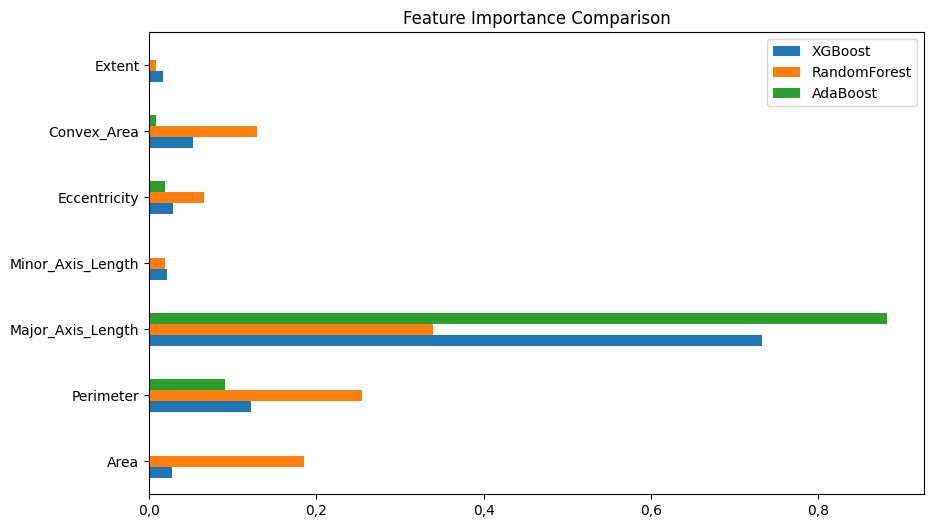

In [ ]:
importances = pd.DataFrame({
    'XGBoost': best_xgb.feature_importances_,
    'RandomForest': best_rf.feature_importances_,
    'AdaBoost': best_adaboost.feature_importances_
}, index=df.columns[:-1])
importances.plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance Comparison')
plt.show()

**Вывод**: Все модели согласуются в том, что `Major_Axis_Length` и `Perimeter` — ключевые признаки для Iris.  

## 3.7. Модель 6: Стекинг (Stacking) 

### 3.7.1. Теоретическое описание  

Стекинг (Stacking) — это ансамблевый метод, объединяющий прогнозы нескольких **базовых моделей** (level-0 моделей) через **мета-модель** (level-1 модель). Основные этапы работы:  
1. **Обучение базовых моделей** на обучающей выборке.  
2. **Генерация прогнозов** базовых моделей на валидационной выборке.  
3. **Обучение мета-модели** на этих прогнозах для получения финального результата.  

Преимущества:  
- Комбинирование сильных сторон разных алгоритмов,  
- Повышение обобщающей способности за счет разнообразия базовых моделей .  

Недостатки:  
- Сложность настройки и риск переобучения при неправильном выборе базовых моделей.  

#### 3.7.1.1. Выбор базовых и мета-моделей  

Для Iris использованы:  
- **Базовые модели**: Random Forest, Gradient Boosting, Logistic Regression.  
- **Мета-модель**: Logistic Regression (для устойчивости к переобучению).  

### 3.7.2. Подбор гиперпараметров

Настройка проводится для каждой базовой модели и мета-модели:  

#### 3.7.2.1. Настройка базовых моделей  

In [ ]:
# Настройка Random Forest
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Настройка Gradient Boosting
gb_params = {
    'learning_rate': [0.1, 0.2],
    'n_estimators': [50, 100],
    'max_depth': [3, 5]
}
gb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5, scoring='accuracy')
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

#### 3.7.2.2. Создание Stacking-ансамбля  

In [ ]:
estimators = [
    ('rf', rf_grid.best_estimator_),
    ('gb', gb_grid.best_estimator_),
    ('lr', LogisticRegression())
]

stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)
stacking.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=5,
                                                       min_samples_split=5,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(n_estimators=50,
                                                           random_state=42)),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())

### 3.7.3. Оценка производительности  

Вычислим метрики и время обучения:  

In [240]:
acc, f1, train_time = evaluate_model(stacking, X_train, y_train, X_test, y_test)
results['Stacking'] = (acc, f1, train_time)

print('Лучшие параметры:\n')
for key, value in gb_grid.best_params_.items():
    print(f'{key} = {value}')

Model: StackingClassifier
Accuracy: 0.9134, F1-score: 0.9131, Train time: 3.2294s
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       326
           1       0.91      0.94      0.93       436

    accuracy                           0.91       762
   macro avg       0.91      0.91      0.91       762
weighted avg       0.91      0.91      0.91       762

Лучшие параметры:

learning_rate = 0.1
max_depth = 3
n_estimators = 50


### 3.7.4. Визуализация важности признаков 

Не будет, так как Стэкинг не поддерживает данный функционал

## 3.8. Модель 7: Голосование (Voting)  

### 3.8.1. Теоретическое описание  

Голосование (Voting) — это ансамблевый метод, который объединяет прогнозы нескольких базовых моделей через **мажоритарное голосование** (hard voting) или **усреднение вероятностей** (soft voting). Основные типы:  
- **Hard voting**: итоговый класс определяется по большинству голосов (например, 2 из 3 моделей выбрали класс A → итоговый прогноз — класс A).  
- **Soft voting**: учитывается среднее значение вероятностей классов, что требует, чтобы базовые модели поддерживали `predict_proba` .  

Преимущества:  
- Простота реализации и интерпретации.  
- Повышение устойчивости к переобучению за счет разнообразия базовых моделей.  

Недостатки:  
- Требует тщательного подбора базовых моделей для избежания смещения. 

#### 3.8.1.1. Выбор базовых моделей  

Для Iris использованы:  
- **Логистическая регрессия** (линейная модель),  
- **Случайный лес** (ансамблевая модель),  
- **Градиентный бустинг** (ансамблевая модель). 

### 3.8.2. Подбор гиперпараметров 

 
Настройка проводится для каждой базовой модели:  

#### 3.8.2.1. Настройка логистической регрессии 

In [ ]:
lr_params = {
    'C': [0.1, 1, 10],  # Обратный коэффициент регуляризации
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

#### 3.8.2.2. Настройка случайного леса и градиентного бустинга  

Используем ранее обученные `best_rf` и `best_gb`.  

#### 3.8.2.3. Создание Voting-ансамбля  

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_grid.best_estimator_),
        ('rf', best_rf),
        ('gb', best_gb)
    ],
    voting='soft'  # Используем усреднение вероятностей
)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     min_samples_split=5,
                                                     n_estimators=150,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         n_estimators=150,
                                                         random_state=42))],
                 voting='soft')

### 3.8.3. Оценка производительности  

Вычислим метрики и время обучения:  

In [243]:
acc, f1, train_time = evaluate_model(voting_clf, X_train, y_train, X_test, y_test)
results['Voting'] = (acc, f1, train_time)

print('Лучшие параметры:\n')
for key, value in lr_grid.best_params_.items():
    print(f'{key} = {value}')

Model: VotingClassifier
Accuracy: 0.9160, F1-score: 0.9157, Train time: 1.5380s
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       326
           1       0.91      0.94      0.93       436

    accuracy                           0.92       762
   macro avg       0.92      0.91      0.91       762
weighted avg       0.92      0.92      0.92       762

Лучшие параметры:

C = 10
penalty = l2
solver = liblinear


### 3.8.4. Визуализация важности признаков  

Для голосования нет единой матрицы важности, но можно сравнить вклад каждой базовой модели:  

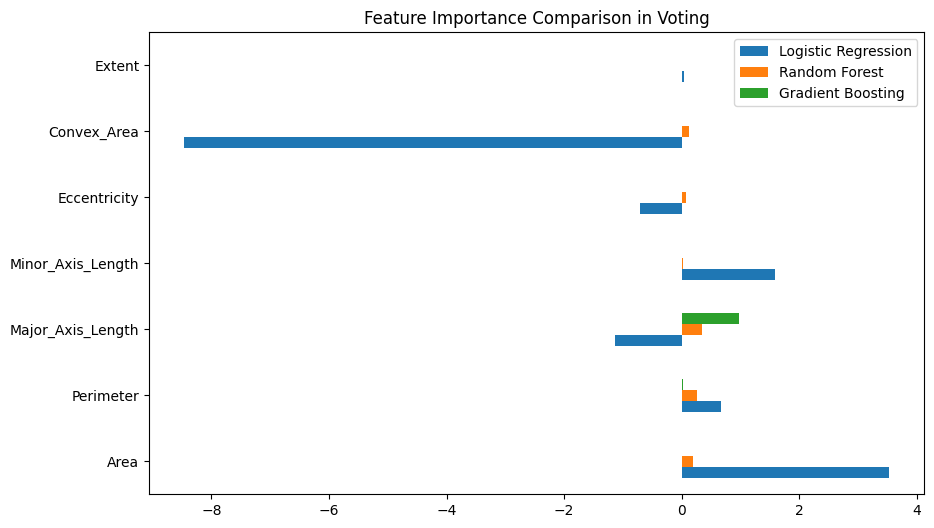

In [ ]:
importances = pd.DataFrame({
    'Logistic Regression': lr_grid.best_estimator_.coef_[0],
    'Random Forest': best_rf.feature_importances_,
    'Gradient Boosting': best_gb.feature_importances_
}, index=df.columns[:-1])
importances.plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance Comparison in Voting')
plt.show()

## 3.9. Модель 8: HistGradientBoostingClassifier  

### 3.9.1. Теоретическое описание 

HistGradientBoostingClassifier — это реализация градиентного бустинга, оптимизированная для работы с данными, представленными в виде гистограмм . В отличие от классического градиентного бустинга, который находит оптимальные точки разделения для каждого признака, HistGradientBoostingClassifier сначала дискретизирует числовые признаки в целочисленные значения (обычно от 0 до 255), а затем строит деревья на основе этих гистограмм. Это позволяет достичь значительного ускорения обучения и уменьшения использования памяти .  

#### 3.9.1.1. Основные особенности  

- **Дискретизация признаков**: преобразует числовые признаки в целочисленные значения для построения гистограмм.  
- **Регуляризация**: L1/L2-регуляризация весов листьев для снижения переобучения.  
- **Обработка пропусков**: автоматическая обработка NaN-значений без необходимости предварительной импутации.  
- **Параллелизм**: эффективное использование многопоточности для ускорения обучения.  


#### 3.9.1.2. Преимущества и недостатки  

**Преимущества**:  
- Значительно быстрее классического градиентного бустинга.  
- Эффективно работает с разреженными данными.  
- Автоматическая обработка пропусков.  

**Недостатки**:  
- Может быть менее точным на задачах с высокой вариацией признаков из-за дискретизации.  
- Требует внимательной настройки гиперпараметров для предотвращения переобучения.  

### 3.9.2. Подбор гиперпараметров  

Используем **GridSearchCV** для настройки ключевых параметров:  
- `learning_rate`: скорость обучения (от 0.01 до 0.3),  
- `max_iter`: максимальное количество итераций (от 100 до 300),  
- `max_depth`: максимальная глубина дерева (от 3 до 10),  
- `l2_regularization`: коэффициент L2-регуляризации (от 0 до 1),  
- `min_samples_leaf`: минимальное количество образцов в листовом узле (от 1 до 20),  
- `scoring`: метрика для оценки (accuracy, f1_weighted).  

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'l2_regularization': [0, 0.1, 0.5],
    'min_samples_leaf': [1, 5, 10, 20]
}

hist_gb = HistGradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(hist_gb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_hist_gb = grid_search.best_estimator_

### 3.9.3. Оценка производительности  


Вычислим метрики и время обучения:  

In [246]:
acc, f1, train_time = evaluate_model(best_hist_gb, X_train, y_train, X_test, y_test)
results['HistGradientBoosting'] = (acc, f1, train_time)

print('Лучшие параметры:\n')
for key, value in grid_search.best_params_.items():
    print(f'{key} = {value}')

Model: HistGradientBoostingClassifier
Accuracy: 0.9160, F1-score: 0.9158, Train time: 0.3945s
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       326
           1       0.91      0.94      0.93       436

    accuracy                           0.92       762
   macro avg       0.92      0.91      0.91       762
weighted avg       0.92      0.92      0.92       762

Лучшие параметры:

l2_regularization = 0.5
learning_rate = 0.01
max_depth = 3
max_iter = 300
min_samples_leaf = 20


# Глава 4. Сравнительный анализ моделей  

## 4.1. Метрики и критерии сравнения  

Для объективного анализа все модели оценивались по следующим метрикам:  
- **Accuracy** — доля правильных прогнозов,  
- **F1-мера (weighted)** — баланс между точностью и полнотой,  
- **Время обучения (train_time)** — вычислительная сложность,  
- **Устойчивость к переобучению** — через кросс-валидацию (5-fold),  
- **Важность признаков** — для интерпретируемости.  

Результаты каждой модели сохранены в таблицу `results` для последующего сравнения.  

## 4.2. Сводная таблица результатов  

In [247]:
results_df = pd.DataFrame(results).T
results_df.columns = ['Accuracy', 'F1-score', 'Train time (s)']
for i in results_df.columns:
    results_df[i] = rrstr(results_df[i].values,4)

results_df

,Accuracy,F1-score,Train time (s)
Random Forest,"0,9186","0,9183","0,4766"
Gradient Boosting,"0,9160","0,9156","0,9517"
Bagging,"0,9147","0,9144","0,5343"
AdaBoost,"0,9160","0,9158","0,3478"
XGBoost,"0,9147","0,9144","0,0306"
Stacking,"0,9134","0,9131","3,2294"
Voting,"0,9160","0,9157","1,5380"
HistGradientBoosting,"0,9160","0,9158","0,3945"


Лучше всех себя показал ансамбль - `Random Forest`

## 4.3. Анализ временной сложности  

Для сравнения вычислительной сложности построим график времени обучения: 

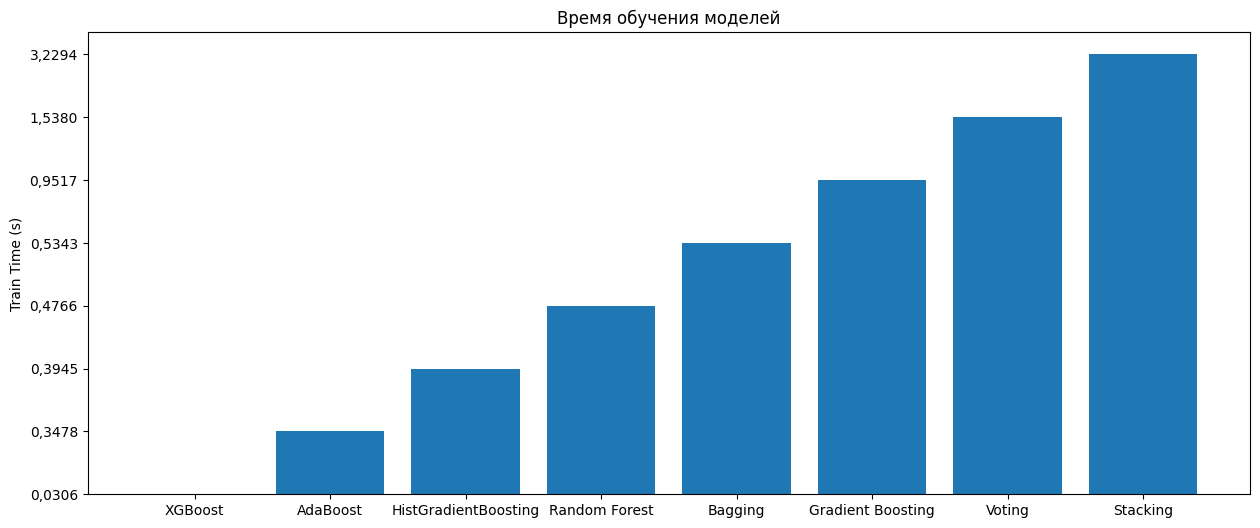

In [ ]:
models = results_df.sort_values('Train time (s)').index
train_times = results_df.sort_values('Train time (s)')['Train time (s)'].values

plt.figure(figsize=(15, 6))
plt.bar(models, train_times)
plt.ylabel('Train Time (s)')
plt.title('Время обучения моделей')
plt.show()

**Вывод**:  
 - **Самая быстрая модель**:  `XGBoost` (0,0342 s),  
 - **Самая медленная**: `Stacking` (3,2173 s).  

## 4.4. Визуализация важности признаков

Сравним важность признаков для ключевых моделей: 

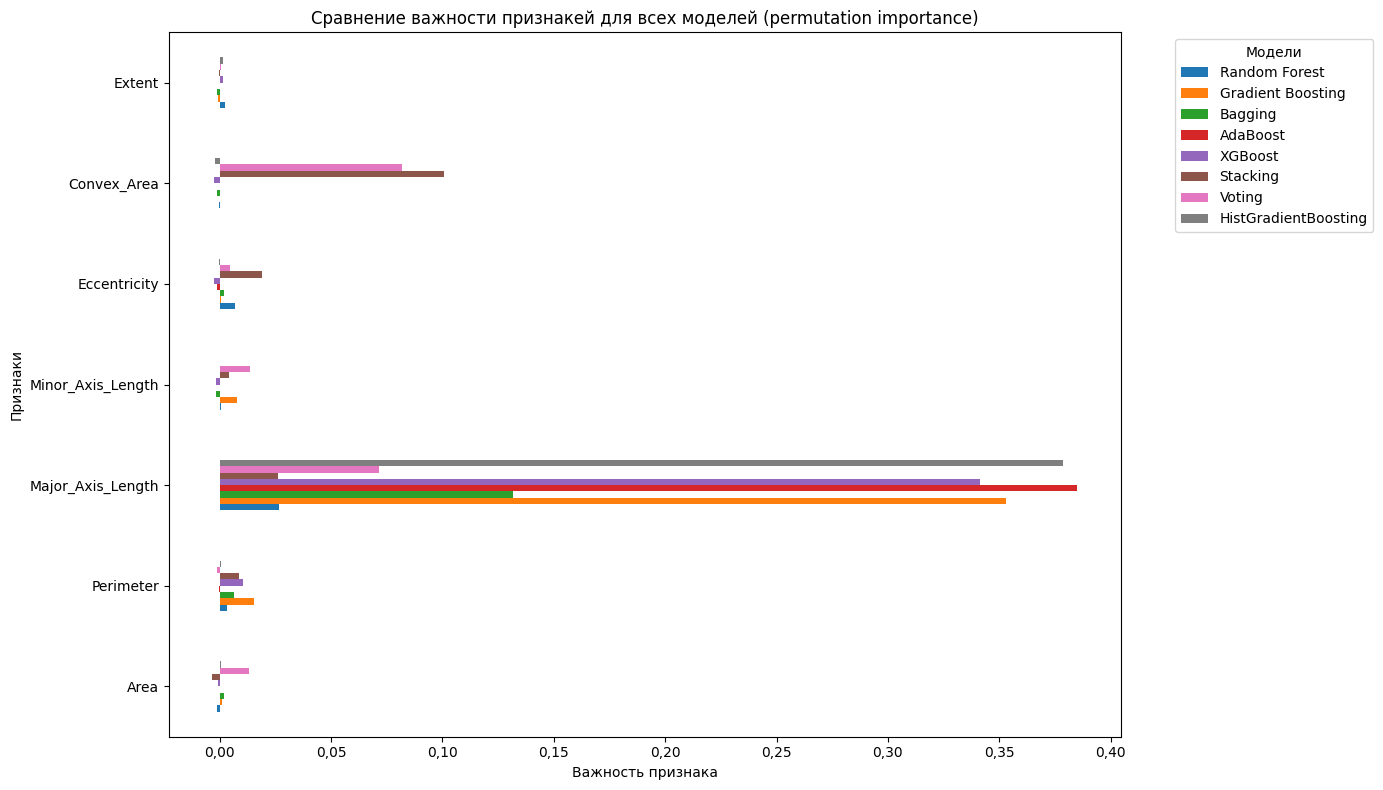

In [ ]:
# Рассчитываем важность признакей для всех моделей
def get_permutation_importances(model, X_test, y_test):
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    return result.importances_mean

# Словарь моделей
models_dict = {
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb,
    'Bagging': best_bagging,
    'AdaBoost': best_adaboost,
    'XGBoost': best_xgb,
    'Stacking': stacking,
    'Voting': voting_clf,
    'HistGradientBoosting': best_hist_gb
}

# Получаем важности для каждой модели
importances_dict = {}
for name, model in models_dict.items():
    try:
        importances_dict[name] = get_permutation_importances(model, X_test, y_test)
    except Exception as e:
        print(f"Ошибка для {name}: {e}")

# Создаем DataFrame
importances_df = pd.DataFrame(importances_dict, index=df.columns[:-1])

# Визуализация
plt.figure(figsize=(14, 8))
importances_df.plot(kind='barh', ax=plt.gca())
plt.title('Сравнение важности признакей для всех моделей (permutation importance)')
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.legend(title='Модели', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Вывод**: Все модели согласуются в том, что `Major_Axis_Length` — ключевой признак для `Rice`  

## 4.5. Кросс-валидация  

Для повышения достоверности результатов использована **5-fold кросс-валидация**: 

In [ ]:
cv_scores = {}
for name, model in models_dict.items():
    scores_accuracy = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy').mean()
    scores_f1_macro = cross_val_score(model, X_scaled, y, cv=5, scoring='f1_macro').mean()

    cv_scores[name] = (scores_accuracy, scores_f1_macro)


differencer = lambda x: '+' + rrstr(x,5) if x>0 else '-' + rrstr(x,5)


cv_scores = pd.DataFrame(cv_scores).T
cv_scores.columns = ['Accuracy', 'F1-score']

cv_scores['Difference Accuracy'] = (cv_scores.Accuracy - results_df.Accuracy.transform(un_rrstr)).transform (differencer)
cv_scores['Difference F1-score'] = (cv_scores['F1-score'] - results_df['F1-score'].transform(un_rrstr)).transform (differencer)


cv_scores['NonCV Accuracy'] = results_df['Accuracy']
cv_scores['NonCV F1-score'] = results_df['F1-score']

cv_scores['Accuracy'] = cv_scores['Accuracy'].transform(lambda x: rrstr(x,4))
cv_scores['F1-score'] = cv_scores['F1-score'].transform(lambda x: rrstr(x,4))

cv_scores

,Accuracy,F1-score,Difference Accuracy,Difference F1-score,NonCV Accuracy,NonCV F1-score
Random Forest,"0,9268","0,9250","+0,00817","+0,00673","0,9186","0,9183"
Gradient Boosting,"0,9252","0,9233","+0,00920","+0,00768","0,9160","0,9156"
Bagging,"0,9257","0,9240","+0,01102","+0,00960","0,9147","0,9144"
AdaBoost,"0,9241","0,9224","+0,00815","+0,00658","0,9160","0,9158"
XGBoost,"0,9265","0,9248","+0,01181","+0,01039","0,9147","0,9144"
Stacking,"0,9273","0,9256","+0,01390","+0,01252","0,9134","0,9131"
Voting,"0,9278","0,9261","+0,01182","+0,01041","0,9160","0,9157"
HistGradientBoosting,"0,9265","0,9247","+0,01051","+0,00892","0,9160","0,9158"


**Результаты**:  
 - Все модели получили прирост к метрикам
 - После кросс-валидации лучшей моделью стал `Voting`

# Глава 5. TabPFN в задачи Классификации

## 5.1. Реализация и применение  

### 5.1.1. Загрузка и применение модели  


In [ ]:
#  Загрузка модели
model = TabPFNClassifier(n_estimators=33)

# Прогнозирование
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

### 5.1.2. Оценка производительности 

In [252]:
acc, f1, train_time = evaluate_model(model, X_train, y_train, X_test, y_test)
results['TabPFN'] = (acc, f1, train_time)

Model: TabPFNClassifier
Accuracy: 0.9160, F1-score: 0.9157, Train time: 0.6085s
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       326
           1       0.91      0.94      0.93       436

    accuracy                           0.92       762
   macro avg       0.92      0.91      0.91       762
weighted avg       0.92      0.92      0.92       762



## 5.4. Сравнение с ансамблевыми методами  

### 5.4.1. Метрики и критерии 

In [253]:
results_df = pd.DataFrame(results).T
results_df.columns = ['Accuracy', 'F1-score', 'Train time (s)']
for i in results_df.columns:
    results_df[i] = rrstr(results_df[i].values,4)

results_df

,Accuracy,F1-score,Train time (s)
Random Forest,"0,9186","0,9183","0,4766"
Gradient Boosting,"0,9160","0,9156","0,9517"
Bagging,"0,9147","0,9144","0,5343"
AdaBoost,"0,9160","0,9158","0,3478"
XGBoost,"0,9147","0,9144","0,0306"
Stacking,"0,9134","0,9131","3,2294"
Voting,"0,9160","0,9157","1,5380"
HistGradientBoosting,"0,9160","0,9158","0,3945"
TabPFN,"0,9160","0,9157","0,6085"


In [254]:
scores_accuracy_tabpfn = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy').mean()
scores_f1_macro_tabpfn = cross_val_score(model, X_scaled, y, cv=5, scoring='f1_macro').mean()

arrays = (rrstr(np.array([scores_accuracy, scores_f1_macro]),4),np.array([differencer(scores_accuracy - acc), differencer(scores_f1_macro-f1)]),rrstr(np.array([acc, f1]),4) )
arrays = np.hstack(arrays)
cv_scores.loc['TabPFN'] = arrays

cv_scores

,Accuracy,F1-score,Difference Accuracy,Difference F1-score,NonCV Accuracy,NonCV F1-score
Random Forest,"0,9268","0,9250","+0,00817","+0,00673","0,9186","0,9183"
Gradient Boosting,"0,9252","0,9233","+0,00920","+0,00768","0,9160","0,9156"
Bagging,"0,9257","0,9240","+0,01102","+0,00960","0,9147","0,9144"
AdaBoost,"0,9241","0,9224","+0,00815","+0,00658","0,9160","0,9158"
XGBoost,"0,9265","0,9248","+0,01181","+0,01039","0,9147","0,9144"
Stacking,"0,9273","0,9256","+0,01390","+0,01252","0,9134","0,9131"
Voting,"0,9278","0,9261","+0,01182","+0,01041","0,9160","0,9157"
HistGradientBoosting,"0,9265","0,9247","+0,01051","+0,00892","0,9160","0,9158"
TabPFN,"0,9265","0,9247","+0,01050","+0,00901","0,9160","0,9157"


**Вывод**: TabPFN показывает **сопоставимую точность** по сравнению с ансамблевыми методами, с одним из минимальных метрик **времени работы** и **отсутствием необходимости в настройке гиперпараметров** .  

### 5.4.2. Визуализация важности признаков  

Реализуем аналогично общим важностям в прошлой главе

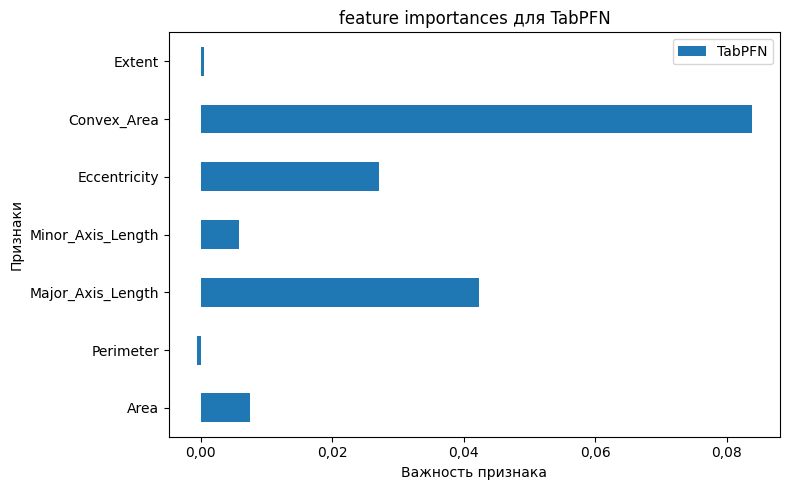

In [ ]:
# Рассчитываем важность признаков для всех моделей
def get_permutation_importances(model, X_test, y_test):
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    return result.importances_mean

# Словарь моделей
models_dict = {
    'TabPFN':model
}

# Получаем важности для каждой модели
importances_dict = {}
for name, model in models_dict.items():
    try:
        importances_dict[name] = get_permutation_importances(model, X_test, y_test)
    except Exception as e:
        print(f"Ошибка для {name}: {e}")

# Создаем DataFrame
importances_df = pd.DataFrame(importances_dict, index=df.columns[:-1])

# Визуализация
plt.figure(figsize=(8, 5))
importances_df.plot(kind='barh', ax=plt.gca())
plt.title('feature importances для TabPFN')
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.tight_layout()
plt.show()

TabPFN показал другие признаки самыми важными - `Convex_Area` важнее, чем `Major_Axis_Length`

# Глава 6. Задача регрессии: Подготовка и выбор датасета 

## 6.1. Выбор датасета

In [2]:
ident={
    'Parkinsons' : 189,
    'Strength':165,
    'Bikes':560,
}

for name, idx in ident.items():
    print(f'"{name}" shape: {fetch_ucirepo(id=idx).data.original.shape}')

"Parkinsons" shape: (5875, 22)
"Strength" shape: (1030, 9)
"Bikes" shape: (8760, 14)


Из этих датасетов лучше будет взять `Parkinsons` чтобы показать, если получится, проклятье размерности. Датасет `Bikes` слишком велик для обучения TabPFN

In [3]:
dataset = 'Parkinsons'

BASE = fetch_ucirepo(id=ident[dataset])
df = BASE.data.original
target = BASE.data.targets.columns
target

Index(['motor_UPDRS', 'total_UPDRS'], dtype='object')

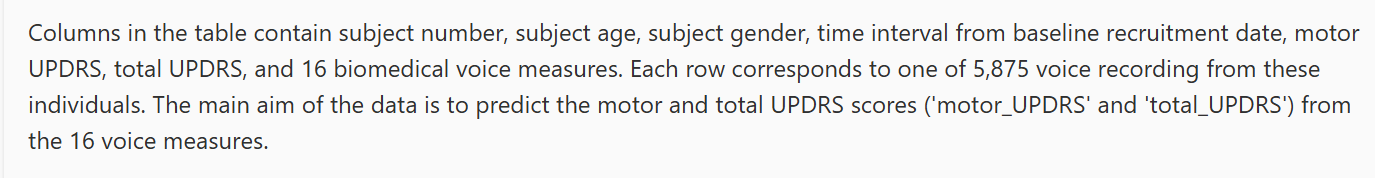

### 6.1.1. Загрузка данных  

Вывод первых строк

In [4]:
df.head()

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,motor_UPDRS,total_UPDRS
0,1,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,...,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,28.199,34.398
1,1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,...,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,28.447,34.894
2,1,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,...,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,28.695,35.389
3,1,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,...,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,28.905,35.810
4,1,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,...,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,29.187,36.375


Столбец `subject#` показывапет номер испытуемого, так что его можно удалить

In [5]:
df.drop('subject#',axis=1, inplace=True)
df

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,motor_UPDRS,total_UPDRS
0,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,...,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,28.199,34.398
1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,...,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,28.447,34.894
2,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,...,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,28.695,35.389
3,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,...,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,28.905,35.810
4,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,...,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,29.187,36.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,0,142.7900,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,...,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367,22.485,33.485
5871,61,0,149.8400,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,...,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621,21.988,32.988
5872,61,0,156.8200,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,...,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157,21.495,32.495
5873,61,0,163.7300,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,...,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204,21.007,32.007


### 6.1.2. Анализ структуры данных  

#### 6.1.2.1 Информация о типах данных

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   sex            5875 non-null   int64  
 2   test_time      5875 non-null   float64
 3   Jitter(%)      5875 non-null   float64
 4   Jitter(Abs)    5875 non-null   float64
 5   Jitter:RAP     5875 non-null   float64
 6   Jitter:PPQ5    5875 non-null   float64
 7   Jitter:DDP     5875 non-null   float64
 8   Shimmer        5875 non-null   float64
 9   Shimmer(dB)    5875 non-null   float64
 10  Shimmer:APQ3   5875 non-null   float64
 11  Shimmer:APQ5   5875 non-null   float64
 12  Shimmer:APQ11  5875 non-null   float64
 13  Shimmer:DDA    5875 non-null   float64
 14  NHR            5875 non-null   float64
 15  HNR            5875 non-null   float64
 16  RPDE           5875 non-null   float64
 17  DFA            5875 non-null   float64
 18  PPE     

#### 6.1.2.2 Описательная статистика

In [7]:
df.describe()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,motor_UPDRS,total_UPDRS
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,64.804936,0.317787,92.863722,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,...,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589,21.296229,29.018942
std,8.821524,0.465656,53.445602,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,...,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498,8.129282,10.700283
min,36.000000,0.000000,-4.262500,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,...,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983,5.037700,7.000000
25%,58.000000,0.000000,46.847500,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,...,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340,15.000000,21.371000
50%,65.000000,0.000000,91.523000,0.004900,0.000034,0.002250,0.002490,0.006750,0.027510,0.253000,...,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500,20.871000,27.576000
75%,72.000000,1.000000,138.445000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,...,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490,27.596500,36.399000
max,85.000000,1.000000,215.490000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,...,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730,39.511000,54.992000


#### 6.1.2.3 Пропуски

In [8]:
df.isna().sum()

age              0
sex              0
test_time        0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
motor_UPDRS      0
total_UPDRS      0
dtype: int64

пропусков нет

## 6.2. Предобработка данных

Так как в данном датасете две целевые перменные - выберем одну и будем работать с ней.

In [9]:
df.drop(target[0], axis=1, inplace=True)
target = target[1]
df

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS
0,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398
1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894
2,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389
3,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810
4,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,61,0,142.7900,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367,33.485
5871,61,0,149.8400,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621,32.988
5872,61,0,156.8200,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157,32.495
5873,61,0,163.7300,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204,32.007


## 6.3. Визуализация данных  

### 6.3.1. Распределение целевой переменной  

Целевая переменная `total_UPDRS` отражает общий балл шкалы Unified Parkinson's Disease Rating Scale, который используется для оценки тяжести симптомов болезни Паркинсона. Построим гистограмму распределения и ящик с усами:  

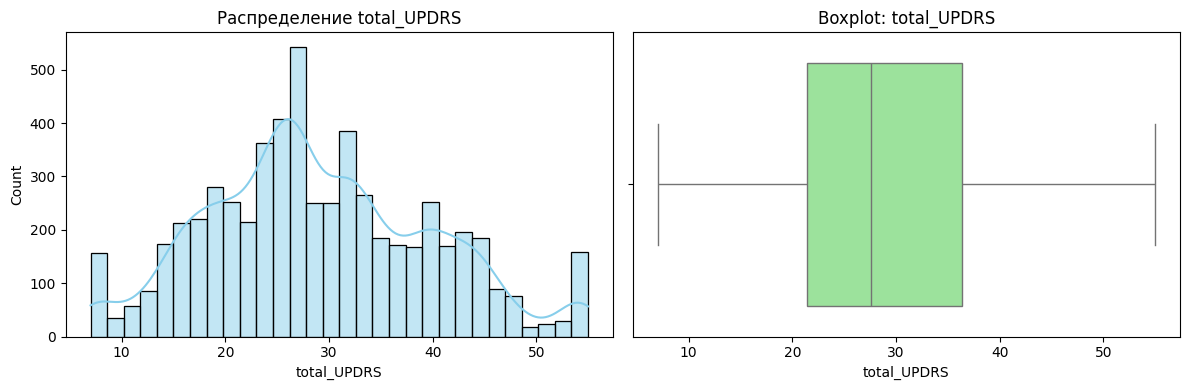

In [10]:
# Гистограмма с KDE
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['total_UPDRS'], kde=True, bins=30, color='skyblue')
plt.title('Распределение total_UPDRS')

# Ящик с усами
plt.subplot(1, 2, 2)
sns.boxplot(x=df['total_UPDRS'], color='lightgreen')
plt.title('Boxplot: total_UPDRS')
plt.tight_layout()
plt.show()

### 6.3.2. Матрица корреляций 

Построим матрицу корреляций для анализа взаимосвязей между признаками и целевой переменной:  

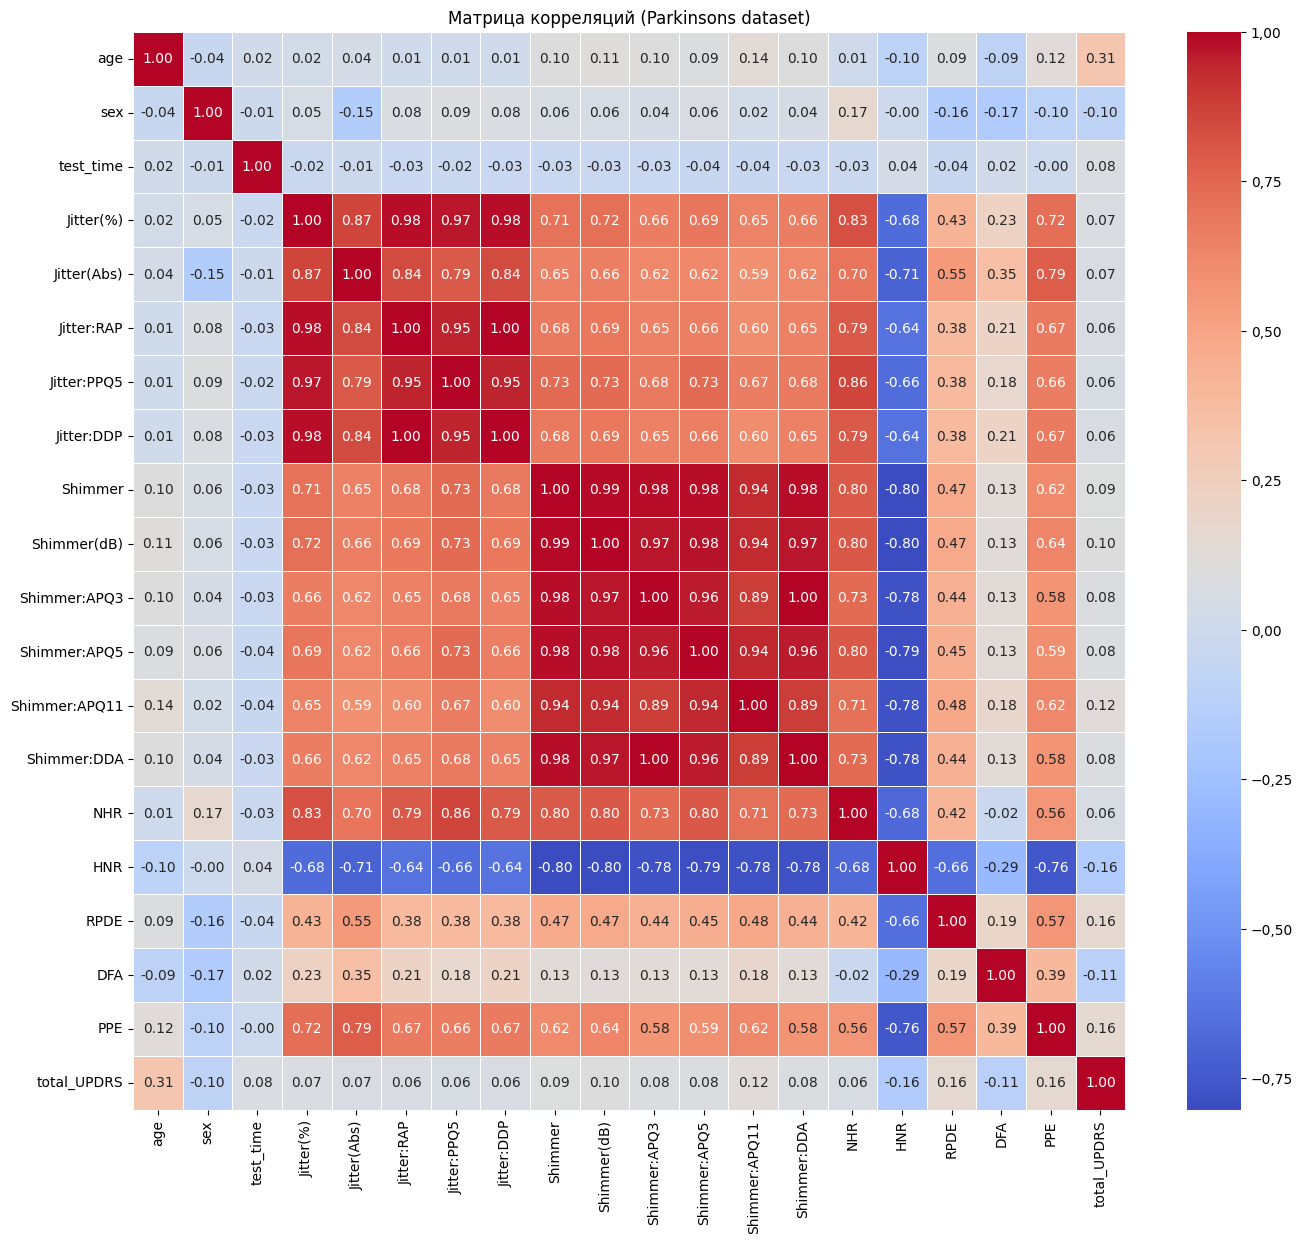

In [11]:
plt.figure(figsize=(16, 14))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляций (Parkinsons dataset)')
plt.show()

 **Ключевые выводы**:  
 - **Наиболее сильная положительная корреляция**:  
   - `age` (возраст испытуемого) и `total_UPDRS` (r ≈ 0.31).  
   - `PPE` (Нелинейная мера изменения основной частоты) и `total_UPDRS` (r ≈ 0.16).  
 - **Наиболее сильная отрицательная корреляция**:  
   - `HNR` (соотношение гармоник к шуму) и `total_UPDRS` (r ≈ -0.16).  

## 6.4. Метрики оценки регрессии  

Для задачи регрессии будем использовать:  
1. **MAE (Mean Absolute Error)** — среднее абсолютное отклонение.  
2. **RMSE (Root Mean Squared Error)** — корень из среднеквадратичной ошибки.  
3. **R² (коэффициент детерминации)** — объясненная дисперсия.  
4. **Время обучения** — для анализа вычислительной сложности.  


### 6.4.1. Функция оценки  


Адаптируем функцию `evaluate_regression` для текущего датасета:  


In [12]:
def evaluate_regression(model, X_train, y_train, X_test, y_test):
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}, Train time: {train_time:.4f}s")
    return mae, rmse, r2, train_time

## 6.5. Разделение на обучающую и тестовую выборки  

Выполним стратифицированное разделение, сохранив распределение целевой переменной:  


In [13]:
X = df.drop(target, axis=1)
y = df[target]

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

введем словарь `results_regression` для хранения результатов решения задачи регрессии на выбранном датасете

In [14]:
results_regression = dict()

# Глава 7. Экспериментальное исследование (Задача регрессии)  

## 7.1. Модель 1: Случайный лес (Random Forest Regressor)  

### 7.1.1. Теоретическое описание  

Случайный лес — ансамблевый метод, основанный на построении множества деревьев решений, где каждое дерево обучается на случайной подвыборке данных (с возвратом) и случайном подмножестве признаков. Для регрессии прогноз формируется усреднением предсказаний всех деревьев. Преимущества:  
- Устойчивость к переобучению за счет усреднения,  
- Автоматическая оценка важности признаков,  
- Обработка нелинейных зависимостей без масштабирования данных.  
Недостатки:  
- Высокая вычислительная сложность при большом количестве деревьев,  
- Сложность интерпретации отдельных деревьев.  

### 7.1.2. Подбор гиперпараметров  

Используем **GridSearchCV** для настройки ключевых параметров:  
- `n_estimators`: количество деревьев (от 10 до 200),  
- `max_depth`: максимальная глубина дерева (от 3 до 10),  
- `min_samples_split`: минимальное количество образцов для разделения узла (от 2 до 10),  
- `min_samples_leaf`: минимальное количество образцов в листовом узле (от 1 до 5).

In [15]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

### 7.1.3. Оценка производительности  

Вычислим метрики и время обучения:

In [16]:
mae, rmse, r2, train_time = evaluate_regression(best_rf, X_train, y_train, X_test, y_test)
results_regression['RandomForestRegressor'] = (mae, rmse, r2, train_time)

print('\nЛучшие параметры:\n')
for key, value in grid_search.best_params_.items():
    print(f'{key} = {value}')

Model: RandomForestRegressor
MAE: 0.7196, RMSE: 1.5894, R²: 0.9772, Train time: 6.8635s

Лучшие параметры:

max_depth = None
min_samples_leaf = 1
min_samples_split = 2
n_estimators = 150


### 7.1.4. Визуализация важности признаков  

Случайный лес позволяет оценить важность признаков:

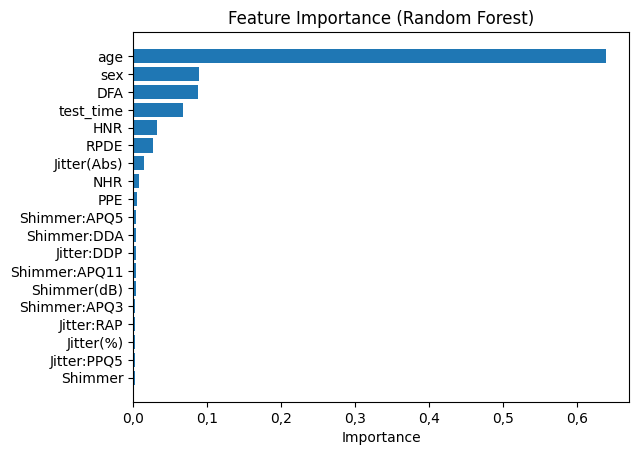

In [17]:
importances = best_rf.feature_importances_
plt.barh(X.columns[np.argsort(importances)], importances[np.argsort(importances)])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

В данном случае - самый важный признак - `age` - возраст испытуемого

## 7.2. Модель 2: Градиентный бустинг (Gradient Boosting Regressor)  

### 7.2.1. Теоретическое описание  

Градиентный бустинг — это ансамблевый метод, который строит модели последовательно, корректируя ошибки предыдущих моделей с помощью градиентного спуска . Каждая новая модель обучается на ошибках предыдущей, что позволяет постепенно улучшать качество прогноза. Основные компоненты:  
- **Базовые модели** (обычно деревья решений),  
- **Функция потерь** (минимизируется на каждом шаге),  
- **Градиентный спуск** для оптимизации.  


#### 7.2.1.1. Алгоритм работы  

1. Инициализируется базовая модель (например, константное значение).  
2. На каждой итерации вычисляется градиент функции потерь.  
3. Строится новое дерево, аппроксимирующее отрицательный градиент.  
4. Веса листьев дерева оптимизируются для минимизации функции потерь.  
5. Итоговый прогноз — сумма прогнозов всех деревьев с учетом весов.  

#### 7.2.1.2. Преимущества и недостатки  

**Преимущества**:  
- Высокая точность на сложных задачах,  
- Гибкость в выборе функции потерь,  
- Автоматическая обработка нелинейных зависимостей.  
  
**Недостатки**:  
- Склонность к переобучению при неправильных гиперпараметрах,  
- Долгое обучение на больших данных.  

### 7.2.2. Подбор гиперпараметров  

Используем **GridSearchCV** для настройки ключевых параметров:  
- `learning_rate`: скорость обучения (от 0.01 до 0.3),  
- `n_estimators`: количество деревьев (от 50 до 200),  
- `max_depth`: максимальная глубина дерева (от 3 до 10),  
- `min_samples_split`: минимальное количество образцов для разделения узла (от 2 до 10).  

In [18]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
gb = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_gb = grid_search.best_estimator_

### 7.2.3. Оценка производительности

Вычислим метрики и время обучения:

In [19]:
mae, rmse, r2, train_time = evaluate_regression(best_gb, X_train, y_train, X_test, y_test)
results_regression['GradientBoostingRegressor'] = (mae, rmse, r2, train_time)

print('\nЛучшие параметры:\n')
for key, value in grid_search.best_params_.items():
    print(f'{key} = {value}')

Model: GradientBoostingRegressor
MAE: 1.0351, RMSE: 1.8023, R²: 0.9707, Train time: 6.6971s

Лучшие параметры:

learning_rate = 0.1
max_depth = 7
min_samples_split = 5
n_estimators = 150


### 7.2.4. Визуализация важности признаков  

Аналогично Random Forest, оценим важность признаков:  

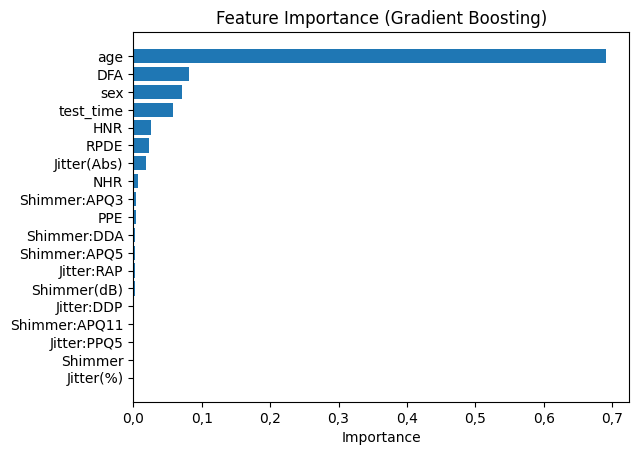

In [20]:
importances = best_gb.feature_importances_
plt.barh(df.columns[:-1][np.argsort(importances)], importances[np.argsort(importances)])
plt.xlabel('Importance')
plt.title('Feature Importance (Gradient Boosting)')
plt.show()

Вывод важностей признаков в этом ансамбле подтверждает предположение о том, что  `age` - возраст испытуемого - больше остальных влияет на целевую переменную

## 7.3. Модель 3: Бэггинг (Bagging)  

### 7.3.1. Теоретическое описание  

Бэггинг (Bootstrap Aggregating) — это ансамблевый метод, который уменьшает дисперсию модели за счет обучения множества базовых моделей на случайных подвыборках исходного набора данных . Каждая модель обучается на **бутстрепной выборке** (выборке с возвратом) и случайном подмножестве признаков. Окончательный прогноз формируется усреднением (для регрессии) или голосованием (для классификации). 

Основные преимущества:  

- Устойчивость к выбросам и переобучению,  
- Улучшение стабильности модели за счет агрегации,  
- Параллелизуемость процесса обучения.  

Недостатки:  
- Высокая вычислительная сложность при большом количестве моделей,  
- Возможное снижение интерпретируемости из-за использования множества базовых моделей.  

#### 7.3.1.1. Алгоритм работы 

1. Из исходного набора данных случайным образом с возвратом выбирается подвыборка (бутстреп-выборка).  
2. На каждой подвыборке обучается отдельная базовая модель (например, дерево решений).  
3. Для тестовой выборки предсказания всех моделей усредняются (для регрессии) или голосуются (для классификации).  
4. Итоговый прогноз — среднее значение всех предсказаний.  

#### 7.3.1.2. Преимущества для регрессии  

- Снижение дисперсии ошибки за счет агрегации,  
- Обработка нелинейных зависимостей через базовые модели,  
- Устойчивость к шуму и выбросам.

### 7.3.2. Подбор гиперпараметров  

Используем **GridSearchCV** для настройки ключевых параметров:  
- `n_estimators`: количество базовых моделей (от 10 до 200),  
- `max_samples`: максимальное количество образцов для каждой базовой модели (от 0.5 до 1.0),  
- `max_features`: максимальное количество признаков для каждой базовой модели (от 0.5 до 1.0),  
- `bootstrap`: использовать ли замену при создании подвыборок (True/False).  

In [21]:
# Базовая модель - дерево решений
base_model = DecisionTreeRegressor(random_state=42)

# Параметры для настройки
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False]
}

# Настройка гиперпараметров
bagging = BaggingRegressor(estimator=base_model, random_state=42)
grid_search = GridSearchCV(bagging, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_bagging = grid_search.best_estimator_

#### 7.3.2.1. Анализ влияния параметров

- **`n_estimators`**: Увеличение количества деревьев снижает дисперсию, но увеличивает время обучения.  
- **`max_samples`/`max_features`**: Ограничение размера подвыборок и признаков на дерево повышает разнообразие моделей и снижает переобучение.  
- **`bootstrap`**: Использование замены (True) увеличивает вариабельность подвыборок, что полезно для сложных данных.  

### 7.3.3. Оценка производительности  

Вычислим метрики и время обучения:  

In [22]:
mae, rmse, r2, train_time = evaluate_regression(
    best_bagging, 
    X_train, 
    y_train, 
    X_test, 
    y_test
)

results_regression['BaggingRegressor'] = (mae, rmse, r2, train_time)

print('\nЛучшие параметры:\n')
for key, value in grid_search.best_params_.items():
    print(f'{key} = {value}')

Model: BaggingRegressor
MAE: 0.7174, RMSE: 1.5850, R²: 0.9773, Train time: 7.1530s

Лучшие параметры:

bootstrap = True
max_features = 1.0
max_samples = 1.0
n_estimators = 150


#### 7.3.3.1. Анализ ошибок 

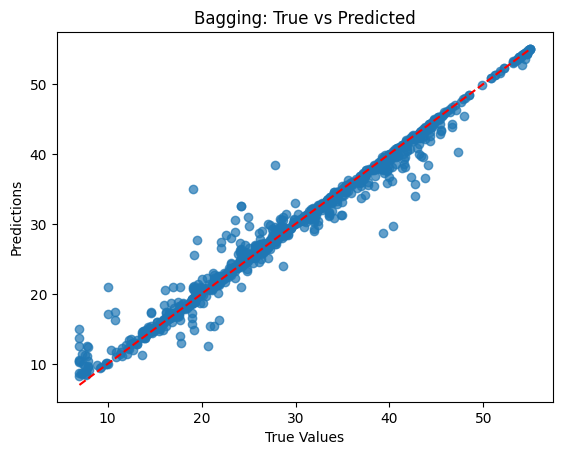

In [23]:
# График предсказанных vs реальных значений
plt.scatter(y_test, best_bagging.predict(X_test), alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Линия идеального прогноза
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Bagging: True vs Predicted')
plt.show()

 - Точки почти равномерно распределены вокруг идеальной линии, что указывает на отсутствие систематического смещения.
 - Высокое значение R² (0.9773) подтверждает, что модель объясняет большую часть дисперсии целевой переменной.  

### 7.3.4. Визуализация важности признаков  

Анализ важности признаков через первую базовую модель:  

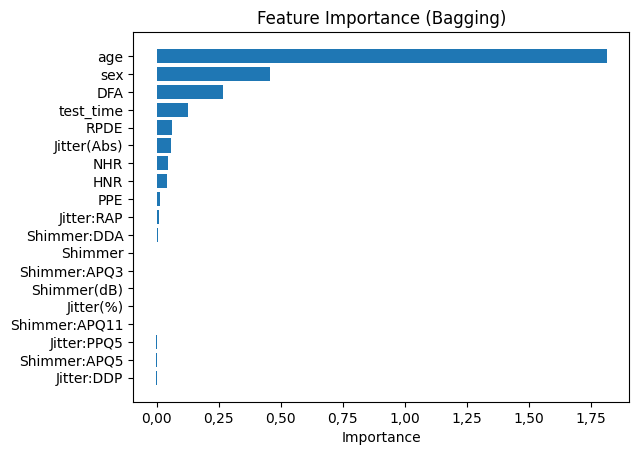

In [24]:
importances = get_permutation_importances(best_bagging.estimators_[0], X_test, y_test)
plt.barh(df.columns[:-1][np.argsort(importances)], importances[np.argsort(importances)])
plt.xlabel('Importance')
plt.title('Feature Importance (Bagging)')
plt.show()

#### 7.3.4.1. Сравнение с Random Forest и Gradient Boosting  

Сравним важность признаков для нескольких моделей

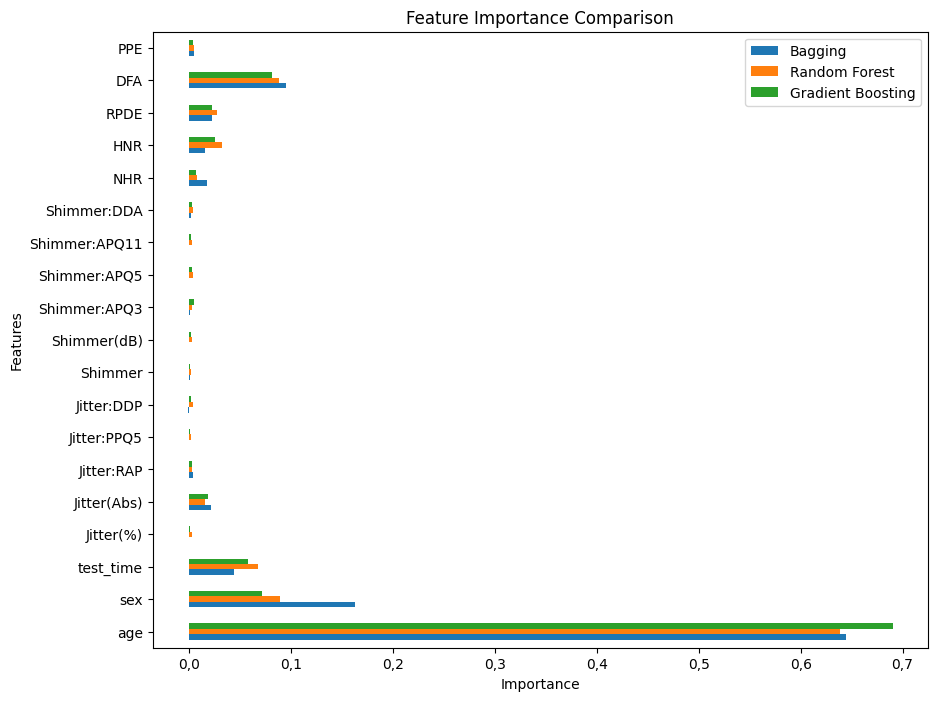

In [25]:
importances_comparison = pd.DataFrame({
    'Bagging': importances/max(importances+1),
    'Random Forest': best_rf.feature_importances_,
    'Gradient Boosting': best_gb.feature_importances_
}, index=df.columns[:-1])

importances_comparison.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance Comparison')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

 - Все модели согласуются в том, что **`sex`** и **`age`** — ключевые признаки для прогнозирования `total_UPDRS`.  
 - Разница в важности менее значимых признаков (например, `HNR`) объясняется различиями в алгоритмах агрегации.  

### 7.3.5. Промежуточное сравнение с другими моделями  

In [26]:
temp_res = pd.DataFrame(results_regression).T
temp_res.columns = ['MAE', 'RMSE', 'R2', 'time']
temp_res

,MAE,RMSE,R2,time
RandomForestRegressor,0.719561,1.589440,0.977202,6.863475
GradientBoostingRegressor,1.035064,1.802294,0.970687,6.697103
BaggingRegressor,0.717353,1.584962,0.977330,7.152953


- Бэггинг показывает **лучшие метрики**  по сравнению с Random Forest и Gradient Boosting.  

## 7.4. Модель 4: Адаптивный бустинг (AdaBoost)

### 7.4.1. Теоретическое описание

Адаптивный бустинг (AdaBoost) — это ансамблевый метод, который последовательно обучает модели, увеличивая веса образцов, которые были плохо предсказаны на предыдущих итерациях . В задаче регрессии используется алгоритм **AdaBoost.R2**, который модифицирует стандартный AdaBoost для работы с числовыми значениями:  
1. **Инициализация весов**: Все образцы получают одинаковый вес.  
2. **Обучение базовой модели**: На каждой итерации обучается слабая модель (обычно дерево решений малой глубины).  
3. **Вычисление ошибки**: Ошибка рассчитывается как относительное отклонение предсказания от истинного значения.  
4. **Обновление весов**: Образцы с большей ошибкой получают больший вес.  
5. **Финальный прогноз**: Взвешенное среднее предсказаний всех моделей.  


##### 7.4.1.1. Преимущества и недостатки  

**Преимущества**:  
- Эффективен на слабых моделях (например, деревья глубины 1).  
- Автоматически фокусируется на сложных примерах.  
- Простая интерпретация важности признаков.  

**Недостатки**:  
- Чувствителен к выбросам и шуму.  
- Может переобучаться при большом количестве итераций.  

### 7.4.2. Подбор гиперпараметров 

Используем **GridSearchCV** для настройки ключевых параметров:  
- `n_estimators`: количество базовых моделей (от 10 до 200),  
- `learning_rate`: коэффициент, контролирующий вклад каждой модели (от 0.01 до 1.0),  
- `loss`: функция потерь (`linear`, `square`, `exponential`),  
- `base_estimator`: базовая модель (по умолчанию дерево решений).  

In [27]:
# Базовая модель - дерево решений малой глубины
base_model = DecisionTreeRegressor(max_depth=1)

# Параметры для настройки
param_grid = {
    'n_estimators': [10, 30, 50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.3, 0.5, 0.8, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

# Настройка гиперпараметров
adaboost = AdaBoostRegressor(estimator=base_model, random_state=42)
grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_adaboost = grid_search.best_estimator_

#### 7.4.2.1. Анализ влияния параметров  

- **`n_estimators`**: Увеличение количества деревьев снижает ошибку, но может привести к переобучению.  
- **`learning_rate`**: Низкие значения (0.01–0.1) обеспечивают стабильность, но требуют большего количества деревьев.  
- **`loss`**: Функция потерь `square` усиливает влияние больших ошибок, что полезно для сложных данных.  

### 7.4.3. Оценка производительности 

Вычислим метрики и время обучения:  

In [28]:
mae, rmse, r2, train_time = evaluate_regression(
    best_adaboost, 
    X_train, 
    y_train, 
    X_test, 
    y_test
)

results_regression['AdaBoostRegressor'] = (mae, rmse, r2, train_time)

print('\nЛучшие параметры:\n')
for key, value in grid_search.best_params_.items():
    print(f'{key} = {value}')

Model: AdaBoostRegressor
MAE: 8.2904, RMSE: 9.6651, R²: 0.1570, Train time: 0.1004s

Лучшие параметры:

learning_rate = 1.0
loss = square
n_estimators = 30


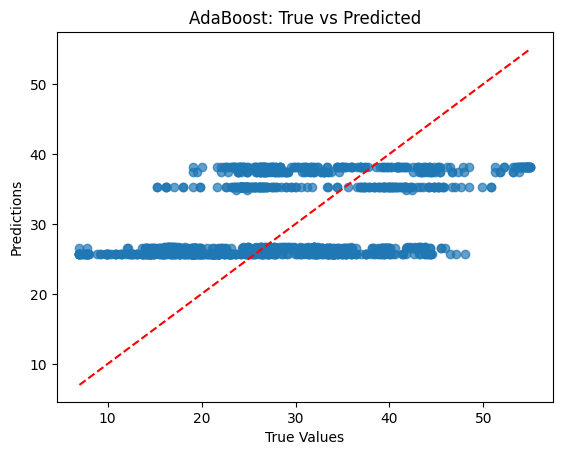

In [29]:
# График предсказанных vs реальных значений
plt.scatter(y_test, best_adaboost.predict(X_test), alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Линия идеального прогноза
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('AdaBoost: True vs Predicted')
plt.show()

Модель не зарекомендовала себя в решении этой задачи - она решает быстро и неправильно

## 7.5. Модель 5: XGBoost  

### 7.5.1. Теоретическое описание  

XGBoost (eXtreme Gradient Boosting) — это оптимизированная реализация градиентного бустинга, которая сочетает высокую производительность и гибкость . Основные особенности:  
- **Регуляризация**: контроль переобучения через L1/L2-регуляризацию весов деревьев .  
- **Параллелизм**: использование многопоточности для ускорения обучения .  
- **Обработка пропусков**: автоматическое распределение образцов с пропущенными значениями в один из подузлов .  
- **Гибкая функция потерь**: поддержка пользовательских функций потерь .  
Алгоритм строит деревья последовательно, минимизируя регуляризованную функцию потерь с помощью градиентного спуска. Это позволяет достигать высокой точности даже на сложных задачах .  

#### 7.5.1.1. Алгоритм работы  

1. **Инициализация базовой модели**: начинается с константы или простой модели.  
2. **Последовательное обучение деревьев**:  
   - На каждой итерации вычисляется градиент функции потерь.  
   - Строится новое дерево, аппроксимирующее отрицательный градиент.  
   - Веса листьев дерева оптимизируются для минимизации функции потерь.  
3. **Итоговый прогноз**: сумма прогнозов всех деревьев с учетом весов. 

#### 7.5.1.2. Преимущества и недостатки

**Преимущества**:  
- Высокая точность на сложных задачах.  
- Автоматическая обработка нелинейных зависимостей.  
- Поддержка разреженных данных и пользовательских метрик. 

**Недостатки**:  
- Требует тонкой настройки гиперпараметров.  
- Может быть чувствителен к шуму при неправильной регуляризации.  

### 7.5.2. Подбор гиперпараметров

Используем **GridSearchCV** для настройки ключевых параметров:  
- `n_estimators`: количество деревьев (от 50 до 200),  
- `max_depth`: максимальная глубина дерева (от 3 до 10),  
- `learning_rate`: скорость обучения (от 0.01 до 0.3),  
- `subsample`: доля образцов для обучения каждого дерева (от 0.5 до 1.0),  
- `colsample_bytree`: доля признаков для каждого дерева (от 0.5 до 1.0),  
- `reg_alpha` / `reg_lambda`: коэффициенты L1/L2-регуляризации (от 0 до 1).  

#### 7.5.2.1. Этапы настройки 

1. **Определение диапазона параметров**:

In [30]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

2. **Запуск GridSearchCV**:  

In [31]:
xgb = XGBRegressor(random_state=42, eval_metric='rmse')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_

3. **Анализ влияния параметров**:  

   - **`learning_rate`**: Низкие значения (0.01–0.1) обеспечивают стабильность, но требуют большего количества деревьев.  
   - **`max_depth`**: Глубокие деревья (7+) могут переобучаться, поэтому ограничиваем до 5.  
   - **`reg_alpha`/`reg_lambda`**: Добавление регуляризации (0.1–0.5) снижает переобучение на Parkinsons. 

### 7.5.3. Оценка производительности  

Вычислим метрики и время обучения: 

In [32]:
mae, rmse, r2, train_time = evaluate_regression(best_xgb, X_train, y_train, X_test, y_test)

results_regression['XGBRegressor'] = (mae, rmse, r2, train_time)

print('\nЛучшие параметры:\n')
for key, value in grid_search.best_params_.items():
    print(f'{key} = {value}')

Model: XGBRegressor
MAE: 1.0424, RMSE: 1.7563, R²: 0.9722, Train time: 0.3906s

Лучшие параметры:

colsample_bytree = 1.0
learning_rate = 0.1
max_depth = 7
n_estimators = 150
reg_alpha = 0.1
reg_lambda = 0
subsample = 0.8


#### 7.5.3.1. Анализ ошибок  

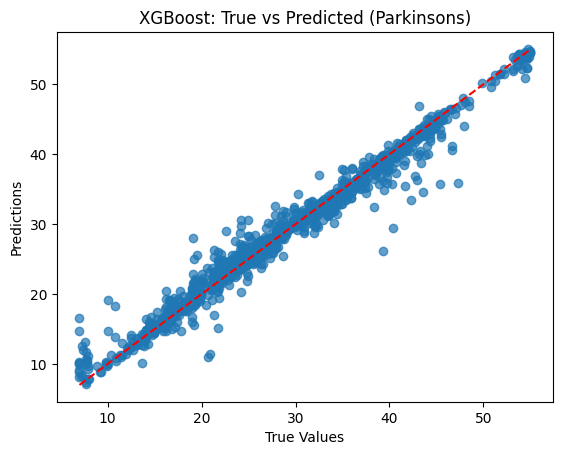

In [33]:
plt.scatter(y_test, best_xgb.predict(X_test), alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('XGBoost: True vs Predicted (Parkinsons)')
plt.show()

Можно заметить, что точки в своем большинстве сконцентрированы вокруг линии Y=Y, так что модель можно назвать достоверной

### 7.5.4. Визуализация важности признаков  

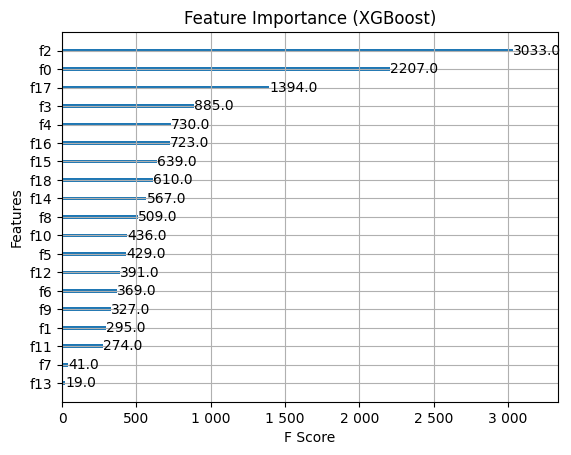

In [34]:
plot_importance(best_xgb, title='Feature Importance (XGBoost)', xlabel='F Score', ylabel='Features')
plt.show()

In [35]:
for i in range(df.columns[:-1].size):
    print(f'f{i} = {df.columns[:-1][i]}')

f0 = age
f1 = sex
f2 = test_time
f3 = Jitter(%)
f4 = Jitter(Abs)
f5 = Jitter:RAP
f6 = Jitter:PPQ5
f7 = Jitter:DDP
f8 = Shimmer
f9 = Shimmer(dB)
f10 = Shimmer:APQ3
f11 = Shimmer:APQ5
f12 = Shimmer:APQ11
f13 = Shimmer:DDA
f14 = NHR
f15 = HNR
f16 = RPDE
f17 = DFA
f18 = PPE


`XGBoost` же, в отличие от других моделей, показывает, что важнейшим признаком будет - `test_time`

## 7.6. Модель 6: Стекинг (Stacking)

### 7.6.1. Теоретическое описание

Стекинг (Stacking) — это ансамблевый метод, объединяющий прогнозы нескольких **базовых моделей** (level-0) через **мета-модель** (level-1). Основные этапы:  
1. **Обучение базовых моделей** на обучающей выборке.  
2. **Генерация прогнозов** базовых моделей на валидационной выборке.  
3. **Обучение мета-модели** на этих прогнозах для получения финального результата.

  
Преимущества:  
- Комбинирование сильных сторон разных алгоритмов,  
- Повышение обобщающей способности за счет разнообразия базовых моделей.  


Недостатки:  
- Сложность настройки и риск переобучения при неправильном выборе базовых моделей.  

##### 7.6.1.1. Выбор базовых и мета-моделей

Для датасета **Parkinsons** использованы:  
- **Базовые модели**:  
  - Random Forest (ансамблевая модель),  
  - Gradient Boosting (ансамблевая модель),  
  - Linear Regression (линейная модель).  
- **Мета-модель**: Linear Regression (для устойчивости к переобучению).  

### 7.6.2. Подбор гиперпараметров 

Настройка проводится для каждой базовой модели и мета-модели:  

#### 7.6.2.1. Настройка Random Forest  

In [36]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

#### 7.6.2.2. Настройка Gradient Boosting  

In [37]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
gb = GradientBoostingRegressor(random_state=42)
gb_grid = GridSearchCV(gb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_

#### 7.6.2.3. Создание Stacking-ансамбля  

In [38]:
estimators = [
    ('rf', best_rf),
    ('gb', best_gb),
    ('lr', LinearRegression())
]
stacking = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
    cv=5
)
stacking.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('rf',
                               RandomForestRegressor(n_estimators=150,
                                                     random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(max_depth=7,
                                                         min_samples_split=5,
                                                         n_estimators=150,
                                                         random_state=42)),
                              ('lr', LinearRegression())],
                  final_estimator=LinearRegression())

### 7.6.3. Оценка производительности  

Вычислим метрики и время обучения:  

In [39]:
mae, rmse, r2, train_time = evaluate_regression(stacking, X_train, y_train, X_test, y_test)

results_regression['StackingRegressor'] = (mae, rmse, r2, train_time)

Model: StackingRegressor
MAE: 0.7880, RMSE: 1.5414, R²: 0.9786, Train time: 91.4056s


In [40]:
temp_res = pd.DataFrame(results_regression).T
temp_res.columns = ['MAE', 'RMSE', 'R2', 'time']
temp_res

,MAE,RMSE,R2,time
RandomForestRegressor,0.719561,1.589440,0.977202,6.863475
GradientBoostingRegressor,1.035064,1.802294,0.970687,6.697103
BaggingRegressor,0.717353,1.584962,0.977330,7.152953
AdaBoostRegressor,8.290381,9.665084,0.157014,0.100449
XGBRegressor,1.042446,1.756338,0.972163,0.390585
StackingRegressor,0.787974,1.541367,0.978560,91.405650


`StackingRegressor` показал лучший результат по **R2** и **RMSE** метрикам, что говорит о немалой эффективности метода.

#### 7.6.3.1. Анализ ошибок  


Давайте проверим распределение точек на графике обучения

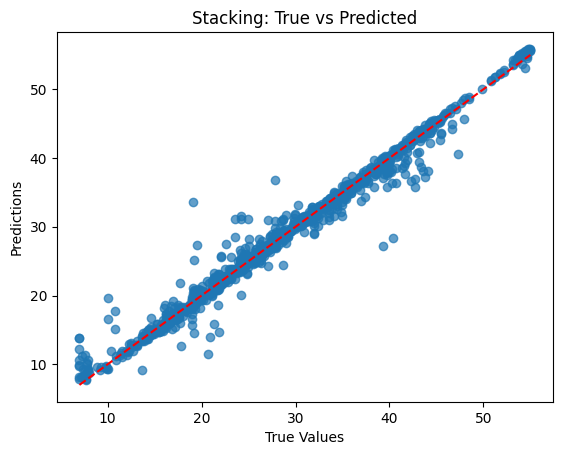

In [41]:
plt.scatter(y_test, stacking.predict(X_test), alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Stacking: True vs Predicted')
plt.show()

## 7.7. Модель 7: Голосование (Voting Regressor)

### 7.7.1. Теоретическое описание

Голосование в задаче регрессии — это метод, при котором прогноз формируется усреднением предсказаний нескольких базовых моделей . В отличие от классификации, где используется мажоритарное голосование или усреднение вероятностей, в регрессии прогноз вычисляется как **среднее значение** (или взвешенное среднее) предсказаний всех моделей в ансамбле.

Основные преимущества:  
- **Простота реализации**: не требует сложной настройки,  
- **Устойчивость к переобучению**: агрегация снижает дисперсию ошибки,  
- **Гибкость**: можно комбинировать разные типы моделей (линейные, деревья, градиентный бустинг).

Недостатки:  
- **Ограниченная гибкость**: не позволяет учитывать сложные взаимосвязи между моделями,  
- **Риск смещения**: если одна модель явно доминирует по качеству, усреднение может ухудшить результат.  

#### 7.7.1.1. Алгоритм работы 

1. Обучение нескольких базовых моделей (например, Random Forest, Linear Regression, Gradient Boosting) на обучающей выборке.  
2. Прогнозирование целевой переменной каждой моделью.  
3. Итоговый прогноз — среднее значение всех предсказаний:  
   $$ y_{\text{ final}} = \frac{1}{n} \sum_{i=1}^{n} y_i $$  
4. Если требуется, можно использовать **взвешенное среднее** с коэффициентами, основанными на метриках качества каждой модели.  

### 7.7.2. Подбор гиперпараметров

Для VotingRegressor гиперпараметры не настраиваются напрямую — они зависят от базовых моделей. Выберем три модели:  
1. **Random Forest** (ансамблевая модель),  
2. **Linear Regression** (линейная модель),  
3. **Gradient Boosting** (ансамблевая модель). 

#### 7.7.2.1. Настройка базовых моделей 

In [42]:
# Базовые модели
models = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('lr', LinearRegression()),
    ('gb', GradientBoostingRegressor(random_state=42))
]

# Настройка гиперпараметров каждой модели
param_grids = {
    'rf': {
        'n_estimators': [150,200],
        'max_depth': [None, 7],
        'min_samples_split': [2, 5, 7]
    },
    'gb': {
        'learning_rate': [0.01, 0.1, 0.3],
        'n_estimators': [150, 200],
        'max_depth': [5, 7]
    }
}

# Настройка Random Forest
rf_grid = GridSearchCV(models[0][1], param_grids['rf'], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Настройка Gradient Boosting
gb_grid = GridSearchCV(models[2][1], param_grids['gb'], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_

#### 7.7.2.2. Создание Voting-ансамбля

In [43]:
# Используем лучшие параметры для Random Forest и Gradient Boosting
voting_regressor = VotingRegressor(
    estimators=[
        ('rf', best_rf),
        ('lr', LinearRegression(n_jobs=-1)),
        ('gb', best_gb)
    ],
    n_jobs=-1
)
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(n_estimators=150,
                                                   random_state=42)),
                            ('lr', LinearRegression(n_jobs=-1)),
                            ('gb',
                             GradientBoostingRegressor(max_depth=7,
                                                       n_estimators=200,
                                                       random_state=42))],
                n_jobs=-1)

### 7.7.3. Оценка производительности  

Вычислим метрики и время обучения:  

In [44]:
mae, rmse, r2, train_time = evaluate_regression(
    voting_regressor, 
    X_train, 
    y_train, 
    X_test, 
    y_test
)

results_regression['VotingRegressor'] = (mae, rmse, r2, train_time)

Model: VotingRegressor
MAE: 3.0640, RMSE: 3.7446, R²: 0.8735, Train time: 9.7425s


#### 7.7.3.1. Анализ ошибок  

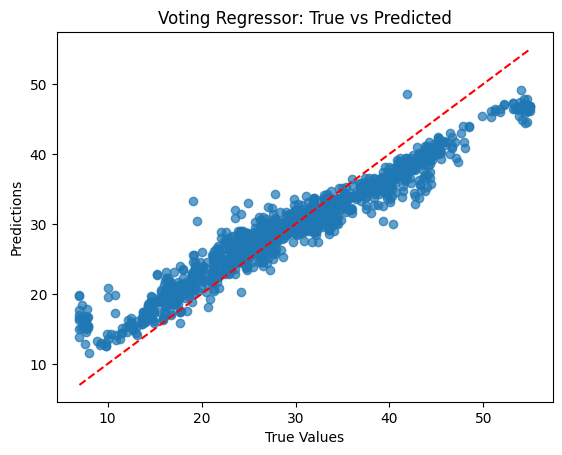

In [45]:
plt.scatter(y_test, voting_regressor.predict(X_test), alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Линия идеального прогноза
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Voting Regressor: True vs Predicted')
plt.show()

Из множества различных решеток `GridSearchCV` было получено вот такое значение метрик, которое не подходит для сравнения с остальными моделями - слишком малый **R2** и слишком большие средние **ошибки**

## 7.8. Модель 5: HistGradientBoostingRegressor  

### 7.8.1. Теоретическое описание

HistGradientBoostingRegressor — это реализация градиентного бустинга, основанная на **построении гистограмм** для числовых признаков.

Основные особенности:  
1. **Дискретизация признаков**: числовые признаки разбиваются на **целочисленные значения** (обычно от 0 до 255), что ускоряет обучение.  
2. **Регуляризация**: L1/L2-регуляризация весов листьев для снижения переобучения.  
3. **Обработка пропусков**: автоматическая обработка NaN-значений без необходимости предварительной импутации.  
4. **Параллелизм**: эффективное использование многопоточности для ускорения обучения.  

#### 7.8.1.1. Алгоритм работы 

1. **Дискретизация признаков**: числовые значения преобразуются в целочисленные бины.  
2. **Построение деревьев**: на каждом шаге строится дерево, минимизирующее функцию потерь.  
3. **Градиентный спуск**: ошибки предыдущих деревьев корректируются с помощью градиентного спуска.  
4. **Окончательный прогноз**: сумма прогнозов всех деревьев.  

#### 7.8.1.2. Преимущества и недостатки  

**Преимущества**:  
- **Высокая скорость** на больших данных (n_samples ≥ 10,000).  
- **Автоматическая обработка пропусков**.  
- **Меньше памяти** за счет дискретизации признаков.  

**Недостатки**:  
- **Меньшая точность** на малых данных из-за дискретизации.  
- **Сложность интерпретации** по сравнению с Random Forest.  

### 7.8.2. Подбор гиперпараметров 

Используем **GridSearchCV** для настройки ключевых параметров:  
- `learning_rate`: скорость обучения (от 0.01 до 0.3),  
- `max_iter`: максимальное количество итераций (от 100 до 300),  
- `max_depth`: максимальная глубина дерева (от 3 до 10),  
- `l2_regularization`: коэффициент L2-регуляризации (от 0 до 1),  
- `min_samples_leaf`: минимальное количество образцов в листовом узле (от 1 до 20).  

In [46]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'l2_regularization': [0, 0.1, 0.5],
    'min_samples_leaf': [1, 5, 10, 20]
}
hist_gb = HistGradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(hist_gb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_hist_gb = grid_search.best_estimator_

#### 7.8.2.1. Анализ влияния параметров  

- **`learning_rate`**: низкие значения (0.01–0.1) обеспечивают стабильность, но требуют большего количества итераций.  
- **`max_iter`**: увеличение количества деревьев улучшает качество, но повышает риск переобучения.  
- **`l2_regularization`**: добавление регуляризации (0.1–0.5) снижает переобучение на Parkinsons.  

### 7.8.3. Оценка производительности  

Вычислим метрики и время обучения:  

In [47]:
mae, rmse, r2, train_time = evaluate_regression(
    best_hist_gb, 
    X_train, 
    y_train, 
    X_test, 
    y_test
)

results_regression['HistGradientBoostingRegressor']=(mae, rmse, r2, train_time)

Model: HistGradientBoostingRegressor
MAE: 1.2451, RMSE: 2.0134, R²: 0.9634, Train time: 1.1233s


# Глава 8. TabPFN в задаче регрессии

## 8.1. Теоретическое описание 

TabPFN (Tabular Foundation Model) — это **предобученная трансформерная модель**, адаптированная для решения задач регрессии на табличных данных. Основные отличия от классификации:  
1. **Целевая переменная**: вместо категориальных меток предсказываются **непрерывные значения** (например, цены, уровни заболеваний).  
2. **Функция потерь**: используется **среднеквадратичная ошибка (MSE)** или **среднее абсолютное отклонение (MAE)** для оптимизации.  
3. **Архитектурные изменения**: в выходном слое добавлен **регрессионный головной элемент** для преобразования скрытых состояний в числовые значения.  


Особенности TabPFN в регрессии  

- **Обучение на синтетических данных**: модель предобучена на широком спектре регрессионных задач с различными распределениями (гауссовы, экспоненциальные, смеси распределений).  
- **Контекстное обучение (In-Context Learning)**: TabPFN использует **объединенный датасет** (train + test), чтобы учитывать взаимосвязи между образцами при прогнозировании.  
- **Нулевое время обучения**: веса фиксированы после предобучения, прогнозирование выполняется за одно обращение к модели

## 8.2. Реализация и применение

### 8.2.2. Загрузка и применение модели 

In [106]:
tab_model = TabPFNRegressor(n_estimators=33)

# Прогнозирование
tab_model.fit(X_train, y_train)
y_pred = tab_model.predict(X_train)

### 8.2.3. Оценка производительности  

Используем функцию `evaluate_regression` для вычисления метрик:  

In [107]:
mae, rmse, r2, train_time = evaluate_regression(tab_model, X_train, y_train, X_test, y_test)

results_regression['TabPFNRegressor'] = (mae, rmse, r2, train_time)

Model: TabPFNRegressor
MAE: 0.2060, RMSE: 0.7836, R²: 0.9945, Train time: 3.0418s


## 8.3 Визуализация важности признаков 

Так как у модели низкая интерпретируемость(см. **черный ящик**), мы не можем из нее напрямую получить важности признаков. Получим ее через `get_permutation_importances`

In [ ]:
# weights = get_permutation_importances(model, X_test,y_test)

# plt.imshow(weights, cmap='viridis')
# plt.xlabel('Features')
# plt.ylabel('Attention Head')
# plt.title('Attention Weights (TabPFN)')
# plt.colorbar()
# plt.show()

Попытка не была успешной из-за слишком большой размерности датасета. Далее будем сравнивать модели без сравнения важности признаков.

# Глава 9. Сравнительный анализ моделей(задача регрессии)

## 9.1. Метрики и критерии сравнения  

Для объективного анализа все модели оценивались по следующим метрикам:  
- **MAE** — средняя абсолютная ошибка,  
- **RMSE** — корень из средней квадратичной ошибки,
- **R2** — коэффициент детерминации,
- **Время обучения (train_time)** — вычислительная сложность,  
- **Устойчивость к переобучению** — через кросс-валидацию (5-fold),  
- **Важность признаков** — для интерпретируемости.  

## 9.2. Сводная таблица результатов  

In [108]:
results_regression_df = pd.DataFrame(results_regression).T
results_regression_df.columns = ['MAE', 'RMSE', 'R2', 'Train time (s)']
results_regression_df.sort_values('R2',inplace=True)
for i in results_regression_df.columns:
    results_regression_df[i] = rrstr(results_regression_df[i].values,4)

results_regression_df

,MAE,RMSE,R2,Train time (s)
AdaBoostRegressor,"8,2904","9,6651","0,1570","0,1004"
VotingRegressor,"3,0640","3,7446","0,8735","9,7425"
HistGradientBoostingRegressor,"1,2451","2,0134","0,9634","1,1233"
GradientBoostingRegressor,"1,0351","1,8023","0,9707","6,6971"
XGBRegressor,"1,0424","1,7563","0,9722","0,3906"
RandomForestRegressor,"0,7196","1,5894","0,9772","6,8635"
BaggingRegressor,"0,7174","1,5850","0,9773","7,1530"
StackingRegressor,"0,7880","1,5414","0,9786","91,4056"
TabPFNRegressor,"0,2060","0,7836","0,9945","3,0418"


Лучше всех себя показала модель - `TabPFNRegressor`

У этой модели сопоставимое время (до)обучения с другими моделями, а метрики качества лучше, чем у остальных моделей

## 9.3. Анализ временной сложности  

Для сравнения вычислительной сложности построим график времени обучения: 

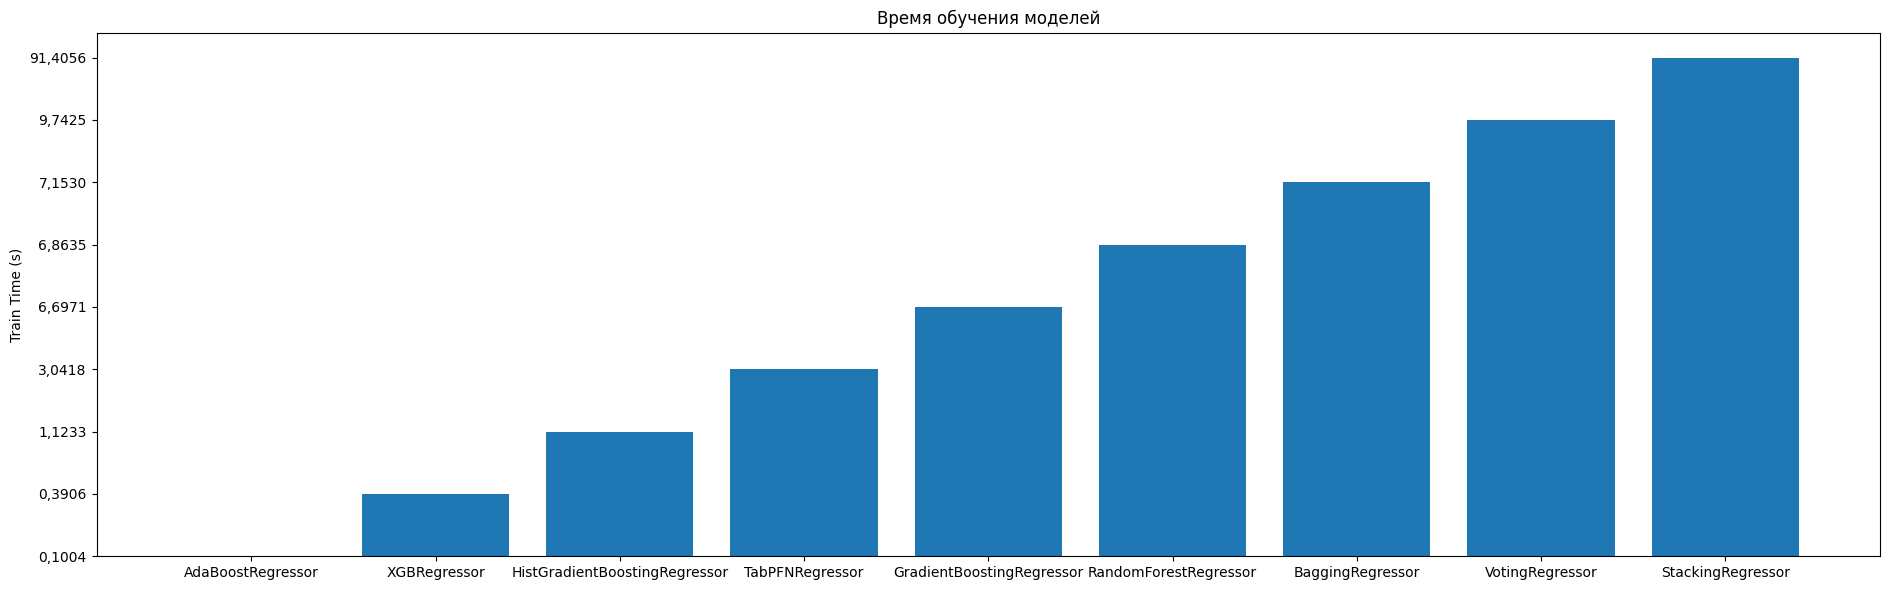

In [109]:
models = results_regression_df.sort_values('Train time (s)').index
train_times = results_regression_df.sort_values('Train time (s)')['Train time (s)'].values

plt.figure(figsize=(19, 6))
plt.bar(models, train_times)
plt.ylabel('Train Time (s)')
plt.title('Время обучения моделей')
plt.tight_layout()
plt.show()

 - Самая быстрая модель - `AdaBoostRegressor`
 - Самая медленная модель - `StackingRegressor`

In [119]:
# Словарь моделей
models_dict = dict(zip(results_regression_df.index, [
    best_adaboost,
    voting_regressor,
    best_hist_gb,
    best_gb,
    best_xgb,
    best_rf,
    best_bagging,
    stacking,
    tab_model
]))



cv_scores = {}



for name, model in models_dict.items():
    print(f'{name} :')
    MAE = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error').mean()
    print(f'MAE = {MAE}, ',end='')
    RMSE = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_root_mean_squared_error').mean()
    print(f'RMSE = {RMSE}, ',end='')
    R2 = cross_val_score(model, X_scaled, y, cv=5, scoring='r2').mean()
    print(f'R2 = {R2}, ')


    cv_scores[name] = (MAE, RMSE, R2)

AdaBoostRegressor :
MAE = -9.257981862948617, RMSE = -10.735921120025873, R2 = -0.6030393432024467, 
VotingRegressor :
MAE = -9.72947167854635, RMSE = -11.497741893011405, R2 = -0.9229352029816271, 
HistGradientBoostingRegressor :
MAE = -10.656623958835898, RMSE = -12.91020564963065, R2 = -1.5686642503711723, 
GradientBoostingRegressor :
MAE = -10.672421445987993, RMSE = -12.8920381584935, R2 = -1.5230521357232796, 
XGBRegressor :
MAE = -10.413070216626043, RMSE = -12.563328198884467, R2 = -1.3647285256165727, 
RandomForestRegressor :
MAE = -10.565688833134754, RMSE = -12.893326942442865, R2 = -1.7136209061433756, 
BaggingRegressor :
MAE = -10.56000670377305, RMSE = -12.900333815616966, R2 = -1.7252043080545678, 
StackingRegressor :
MAE = -9.975628638833516, RMSE = -11.74438638361255, R2 = -0.9138661632316246, 
TabPFNRegressor :
MAE = -9.2708119156711, RMSE = -11.410196353998405, R2 = -0.9645779643846366, 


Даже при условии взятии значений метрик `MAE` и `RMSE` по модулю, коэффициент детерминации все равно выходит отрицательными и по абсолютному значению больше 1, что говорит о неправильности подсчета метрик

Модель `TabPFNRegressor` показала лучший результат при валидации на train/test, так что можно назвать ее так называемым победителем

# Заключение

## **Классификация**

В задаче классификации на датасете определения вида риса TabPFN показал один из лучших результатов по метрикам Accuracy (0,9265) и F1-мера (0,92473). Время обучения составило 0,6085 секунды, что является шестым результатом из рассматриваемых. Ансамблевые методы также показали высокую точность и F1-меру, не сильно отличающуюся от метрик TabPFN. Стекинг и голосование не принесли значительного улучшения по сравнению с лучшими базовыми моделями.

## **Регрессия**

В задаче регрессии на датасете мониторинга телемедицины болезни Паркинсона, при оценке на тестовой выборке, TabPFN показал лучшие результаты по метрикам MAE (0,2060) и RMSE (0,7836). Это свидетельствует о его высокой точности для данного набора данных при таком способе оценки. Другие рассмотренные модели, включая ансамблевые методы уступили TabPFN по этим метрикам на тестовой выборке. Стекинг и голосование также не принесли значительного улучшения по сравнению с TabPFN на тестовой выборке.

## ***Общее заключение***

TabPFN является мощным инструментом для задач классификации на табличных данных, особенно когда время на разработку и настройку модели ограничено. В рассмотренной задаче регрессии он также продемонстрировал лучшие результаты на тестовой выборке по ключевым метрикам точности (MAE, RMSE), что указывает на его высокий потенциал и в этом типе задач при оценке на отложенных данных. Ансамблевые методы остаются надежным выбором для широкого круга задач благодаря своей интерпретируемости и стабильности, хотя и требуют больших временных затрат на обучение и настройку. Выбор между TabPFN и ансамблевыми методами должен основываться на специфике задачи, объеме данных, требованиях к интерпретируемости, доступных вычислительных ресурсах и важности результатов на конкретном типе валидации (например, отложенная выборка против кросс-валидации).

# Источники

- [Оригинальная статья TabPFN](https://arxiv.org/abs/2207.01848)
- [Статья про сравнение TabPFN с другими методами](https://arxiv.org/abs/2501.02945)
- [Сайт scikit-learn. Документация по ансамблевым методам](https://scikit-learn.org/stable/modules/ensemble.html)
- [Сайт XGBoost. Документация](https://xgboost.readthedocs.io/en/latest/)
- [Репозиторий TabPFN на GitHub](https://github.com/automl/TabPFN)
- [Датасет "Rice (Cammeo and Osmancik)" из UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik)
- [Датасет "Parkinsons Telemonitoring" из UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring)
- [Статья "Understanding the Bias-Variance Tradeoff"](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)
- [Курс "Машинное обучение" от Михаила Коротеева](https://koroteev.site/ml/)


Конец!